# COGS 108 - Evolution of Kanye West

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

In this project, we set out to understand how Kanye West’s music has changed over the years. More specifically, we focused on analyzing the musical characteristics of his music based on lyrics and Spotify-based characteristics. In the end, we found that certain musical characteristics such as energy, key, speechiness, and valence showed a decreasing trend, the lexical diversity did not show a significant change, and that sentiment followed a V-shaped trend.

# Project Video

[Project Video](https://www.youtube.com/watch?v=LUSH7LKt7mM)

# Names

- Cairo Simpson
- Michelle Liu
- Michael Donaldson
- Matthew Leffler
- Charmie Donasco

<a id='research_question'></a>
# Research Question

How have the musical characteristics of Kanye West evolved from their first album, the College Dropout, to their latest, Donda (Deluxe)?

<a id='background'></a>

## Background & Prior Work

Kanye West is an American artist well known for his musical career and impact on the rap genre as a whole. He is widely considered as one of the most influential musicians of his generation - famous for his high-level of production and distinct sampling. From his first recorded album, The College Dropout, released in 2004 to one of his latest releases, Donda (2021), Kanye West is an artist that constantly challenges himself to change the sonic landscape of his music. His vast discography falls under the umbrella of hip-hop and rap, but each album is unique and has it’s own added style - soul, pop, and gospel to name a few. 

Previous analyses such as The Data Science of Kanye[^duran], have done similar research in their endeavor of creating a prediction generator that predicts whether a song would be considered ‘Old Kanye’ or ‘New Kanye’. Their work analyzes each solo album based on certain features provided by the Spotify API and a sentiment analysis using the Genius API to predict their outcomes. Their data analysis tested a 60% accuracy and a 50% precision score, meaning that their prediction model was not able to make reliable distinctions. Another work[^sentiment] analyzed Ye’s album by running a sentiment analysis of his whole discography up to The Life of Pablo (2016), analyzing which solo albums are considered ‘happy’ or ‘sad’. We learn that there was a significant drop in happiness in the album 808s & Heartbreak (2008) and the albums after My Beautiful Dark Twisted Fantasy (2010). 

[^duran]: Duran, Charlotte. “The Data Science of Kanye. By Nate Shirley, Claire Martin, &… | by Charlotte Duran.” Medium, 1 May 2019, https://medium.com/@charlotteduran8/the-data-science-of-kanye-ebdf545b52f4. Accessed 20 April 2022.

[^sentiment]: “Sentiment Analysis of Kanye West's Discography — Mark H. White II, PhD.” Mark H. White II, PhD, 20 May 2017, https://www.markhw.com/blog/kanye-sentiment. Accessed 20 April 2022.

# Hypothesis

Using Spotify’s API, we will explore danceability, acousticness, instrumentalness, liveness, loudness, speechiness, tempo, and valence. Based on the group’s listening experience with Kanye West’s music, we believe that danceability and loudness will increase and then decrease, valence will increase, acousticness, instrumentalness, and speechiness will decrease, and liveness and tempo will experience no change, as his discography shifted from soul to pop to gospel. Additionally, in terms of the trend in sentiment, we believe the trend will see a V-shaped trend, in which sentiment will be on a downward trend for the first half of his discography (“The College Dropout” to “Yeezus”), then there will be an increase in the sentiment value in the second half (“The Life of Pablo” to “Donda (Deluxe)”).

# Dataset(s)

- Dataset Name: spotify_features.csv
- Link to the dataset: https://github.com/COGS108/Group034Sp22/blob/master/Kanye_Audio_Features
- Number of observations: 199

Contains the audio features, year, and album for every song contained in Kanye's albums, pulled from Spotify. The description for each audio feature is detailed below, defined by Spotify's API guide.

| Attribute        | Description                                                                                                                                                                                                            |
|------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Danceability     | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.                                                     |
| Energy           | Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.             |
| Key              | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.                                                                         |
| Loudness         | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.                                                       |
| Mode             | Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                             |
| Speechiness      | This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.                                      |
| Acousticness     | A confidence measure from 0.0 to 1.0 of whether the track is acoustic.                                                                                                                                                 |
| Instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.                                                        |
| Liveness         | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.                                                                     |
| Valence          | Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| Tempo            | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.                            |

Below is the code used to create the dataset using Spotify API

In [ ]:
import sys
!{sys.executable} -m pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [ ]:
# Setting up dataframe
column_names = ["Track Name", "Album", "Release Date", "Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]
df = pd.DataFrame(columns = column_names)

#Token Authorization
cid = "a0624b5f89ae43e081ff403d7d748fee"
secret = "74c99f42760345109f30cacae8334ad7"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

######### Discography Part 1 ############

playlist_link = "https://open.spotify.com/playlist/1dztCX69ug6G4o9jK2zJ2S?si=xLf4TI-MQAyMvWDX2zI9Nw"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

for track in sp.playlist_tracks(playlist_URI)["items"]:
    track_info = {}
    features = sp.audio_features(track["track"]["uri"])
    track_info["Track Name"] = track["track"]["name"]
    track_info["Album"] = track["track"]["album"]["name"]
    track_info["Release Date"] = track["track"]["album"]["release_date"]
    track_info["Danceability"] = features[0]["danceability"]
    track_info["Energy"] = features[0]["energy"]
    track_info["Key"] = features[0]["key"]
    track_info["Loudness"] = features[0]["loudness"]
    track_info["Mode"] = features[0]["mode"]
    track_info["Speechiness"] = features[0]["speechiness"]
    track_info["Acousticness"] = features[0]["acousticness"]
    track_info["Instrumentalness"] = features[0]["instrumentalness"]
    track_info["Liveness"] = features[0]["liveness"]
    track_info["Valence"] = features[0]["valence"]
    track_info["Tempo"] = features[0]["tempo"]
    df.loc[df.shape[0]] = track_info

######### Discography Part 2 ###########

playlist_link = "https://open.spotify.com/playlist/4YadIK03lniReeC1m5aFcg?si=9UqvaaA8R6qk9T5a1GZEfg"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]


for track in sp.playlist_tracks(playlist_URI)["items"]:
    track_info = {}
    features = sp.audio_features(track["track"]["uri"])
    track_info["Track Name"] = track["track"]["name"]
    track_info["Album"] = track["track"]["album"]["name"]
    track_info["Release Date"] = track["track"]["album"]["release_date"]
    track_info["Danceability"] = features[0]["danceability"]
    track_info["Energy"] = features[0]["energy"]
    track_info["Key"] = features[0]["key"]
    track_info["Loudness"] = features[0]["loudness"]
    track_info["Mode"] = features[0]["mode"]
    track_info["Speechiness"] = features[0]["speechiness"]
    track_info["Acousticness"] = features[0]["acousticness"]
    track_info["Instrumentalness"] = features[0]["instrumentalness"]
    track_info["Liveness"] = features[0]["liveness"]
    track_info["Valence"] = features[0]["valence"]
    track_info["Tempo"] = features[0]["tempo"]
    df.loc[df.shape[0]] = track_info

df.to_csv("spotify_features.csv", index = False)

- Dataset Name: lyrics.csv
- Link to the dataset: https://github.com/COGS108/Group034Sp22/blob/master/lyrics.csv
- Number of observations: 205

Below is the code used to create the dataset using Genius API.

In [ ]:
import sys
!{sys.executable} -m pip install lyricsgenius

import pandas as pd
import api_key
import lyricsgenius
import json

Here, we create a list of all albums that are of interest and query for JSON files by album for each of them.

In [ ]:
genius = lyricsgenius.Genius(api_key.GENIUS_CLIENT_TOKEN)
genius.verbose = False
genius.remove_section_headers = True
albums = ["The College Dropout", "Late Registration", "Graduation", "808s & Heartbreak", 
          "My Beautiful Dark Twisted Fantasy", "Watch the Throne", 
          "Kanye West Presents: Good Music - Cruel Summer G.O.O.D. Music", "Yeezus", 
          "The Life of Pablo", "ye", "KIDS SEE GHOSTS", "JESUS IS KING", "Donda (Deluxe)"]
names = ["college_dropout", "late_registration", "graduation", "808s_and_heartbreak",
        "dark_fantasy", "watch_the_throne", "good_music", "yeezus", "life_of_pablo", 
        "ye", "kids_see_ghosts", "jesus_is_king", "donda"]
artists = ["Kanye West", "G.O.O.D Music", "KIDS SEE GHOSTS"]

for i, album in enumerate(albums):
    while True: # while loop because library often times out
        try:
            if album == "Kanye West Presents: Good Music - Cruel Summer G.O.O.D. Music":
                search = genius.search_album(album, "G.O.O.D Music")
            elif album == "KIDS SEE GHOSTS":
                search = genius.search_album(album, "KIDS SEE GHOSTS")
            else:
                search = genius.search_album(album, "Kanye West")
            search.save_lyrics(f'{names[i]}.json')
            break
        except:
            pass

For each JSON file, we write the data fields of interest to a CSV file, which are the lyrics.

In [ ]:
df = pd.DataFrame(columns = ['Track Name', 'Album', 'Lyrics'])

for name in names:
    json_file = open(f'json/{name}.json')
    data = json.load(json_file)
    for track in data['tracks']:
        df = df.append({'Track Name': track['song']['full_title'], 'Album': data['name'], 'Lyrics': track['song']['lyrics']}, ignore_index=True)

df.to_csv('lyrics.csv', index=False)

# Setup

In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)

import nltk
import string
import json
import re
import sys
from urllib.request import urlopen

from nltk.sentiment.vader import SentimentIntensityAnalyzer 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})

import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

!{sys.executable} -m pip install pymannkendall
import pymannkendall as mk

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data Cleaning

Here, we can take a glimpse at the two datasets that we are working with.

In [2]:
df_spotify = pd.read_csv('spotify_features.csv')
df_spotify.head()

,Track Name,Album,Release Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Intro,The College Dropout,2004-02-10,0.713,0.331,6,-13.909,1,0.8770,0.2370,0.000000,0.510,0.463,87.491
1,We Don't Care,The College Dropout,2004-02-10,0.595,0.754,11,-5.827,0,0.1810,0.0142,0.000000,0.247,0.647,83.155
2,Graduation Day,The College Dropout,2004-02-10,0.418,0.447,0,-9.058,0,0.3380,0.6840,0.000002,0.414,0.869,169.336
3,All Falls Down,The College Dropout,2004-02-10,0.657,0.734,8,-4.832,0,0.4840,0.1490,0.000000,0.139,0.434,91.030
4,I'll Fly Away,The College Dropout,2004-02-10,0.239,0.250,6,-11.414,1,0.0289,0.7600,0.000000,0.124,0.564,172.338


In [3]:
df_lyrics = pd.read_csv('lyrics.csv')
df_lyrics.head()

,Track Name,Album,Lyrics
0,Intro by Kanye West,The College Dropout,"Intro Lyrics\nKanye, can I talk to you for a m..."
1,We Don't Care by Kanye West,The College Dropout,"We Don’t Care Lyrics\nOh, yeah\nI got the perf..."
2,Graduation Day by Kanye West,The College Dropout,Graduation Day Lyrics\nWhat in the fuck was th...
3,All Falls Down by Kanye West (Ft. Syleena John...,The College Dropout,"All Falls Down Lyrics\nOh, when it all, it all..."
4,I'll Fly Away by Kanye West,The College Dropout,"I’ll Fly Away Lyrics\nOne glad morning, when t..."


While the Spotify features dataset was pulled in a pretty clean manner that does not require much changes, there are definitely a few issues in the lyrics dataset. Namely, the track names aren't coherent with the Spotify dataset, and the lyrics are initialized with their respective song names.

Regarding the former, we can make a relatively simple fix by removing everything after the word 'by', since none of his actual songs seem to have the actual word. The latter could be fixed pretty easily as well by looking at everything after the first line break, which is denoted by a 'Lyrics'. Additionally, we'll also go ahead and expand out all contractions easier pre-processing.

In [4]:
def fix_song_name(song_name):
    song_name = str(song_name)
    return song_name.split(' by')[0]

def fix_lyrics(lyrics):
    lyrics = str(lyrics)
    split = lyrics.split('Lyrics', 1)
    if len(split) > 1:
        return split[1]
    else:
        return lyrics
    
def expand(lyrics):
    lyrics = re.sub(r"won\'t", "will not", lyrics)
    lyrics = re.sub(r"can\'t", "cannot", lyrics)
    lyrics = re.sub(r"n\'t", " not", lyrics)
    lyrics = re.sub(r"\'re", " are", lyrics)
    lyrics = re.sub(r"\'s", " is", lyrics)
    lyrics = re.sub(r"\'d", " would", lyrics)
    lyrics = re.sub(r"\'ll", " will", lyrics)
    lyrics = re.sub(r"\'t", " not", lyrics)
    lyrics = re.sub(r"\'ve", " have", lyrics)
    lyrics = re.sub(r"\'m", " am", lyrics)
    return lyrics

df_lyrics['Track Name'] = df_lyrics['Track Name'].map(fix_song_name)
df_lyrics['Lyrics'] = df_lyrics['Lyrics'].map(fix_lyrics)
df_lyrics['Lyrics'] = df_lyrics['Lyrics'].map(expand)
df_lyrics

,Track Name,Album,Lyrics
0,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a..."
1,We Don't Care,The College Dropout,"\nOh, yeah\nI got the perfect song for the kid..."
2,Graduation Day,The College Dropout,"\nWhat in the fuck was that, Kanye?! I told yo..."
3,All Falls Down,The College Dropout,"\nOh, when it all, it all falls down\nYeah, th..."
4,I'll Fly Away,The College Dropout,"\nOne glad morning, when this life is over, I ..."
...,...,...,...
200,Jesus Lord,Donda (Deluxe),\nTell me if you know someone that needs (Jesu...
201,Ok Ok pt 2 (Deluxe Version),Donda (Deluxe),"\nOkay, now they got me wanna rap again\nHeale..."
202,Junya pt 2,Donda (Deluxe),"\nJunya Watanabe on my wri', wri'\nJunya Watan..."
203,Jail pt 2,Donda (Deluxe),\nTake what you want\nTake everything\nTake wh...


Upon closer inspection of the data, there are also a few entries here that are invalid. Four of these entries are 'booklets', and are not actually songs or even part of the album. One of these entries is a part of an album, but is purely instrumental. We'll go ahead and remove all of these.

In [5]:
df_lyrics = df_lyrics.drop(df_lyrics.index[[22, 46, 62, 78, 147]])
df_lyrics.reset_index()

,index,Track Name,Album,Lyrics
0,0,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a..."
1,1,We Don't Care,The College Dropout,"\nOh, yeah\nI got the perfect song for the kid..."
2,2,Graduation Day,The College Dropout,"\nWhat in the fuck was that, Kanye?! I told yo..."
3,3,All Falls Down,The College Dropout,"\nOh, when it all, it all falls down\nYeah, th..."
4,4,I'll Fly Away,The College Dropout,"\nOne glad morning, when this life is over, I ..."
...,...,...,...,...
195,200,Jesus Lord,Donda (Deluxe),\nTell me if you know someone that needs (Jesu...
196,201,Ok Ok pt 2 (Deluxe Version),Donda (Deluxe),"\nOkay, now they got me wanna rap again\nHeale..."
197,202,Junya pt 2,Donda (Deluxe),"\nJunya Watanabe on my wri', wri'\nJunya Watan..."
198,203,Jail pt 2,Donda (Deluxe),\nTake what you want\nTake everything\nTake wh...


In order to prepare for lexical analysis, we also need to do a bit of pre-processing using the nltk library. We'll first start off by lowercasing and tokenizing the lyrics. We also notice that from doing this process that the last string in the array is an "##Embed" string, which isn't part of the actual lyrics, so we'll also remove that as well. Furthermore, we'll go ahead and remove the stop words from the lyrics, since they won't carry any meaningful weight to our analysis. Lastly, we'll perform lexicon normalization to standardize similar words through lemmatization, which returns the base word (lemma) of each phrase in an improved manner from stemming.

In [6]:
def create_lyrics_token(lyrics):
    lyrics = lyrics.lower()
    lyrics = nltk.tokenize.word_tokenize(lyrics)
    lyrics.pop()
    return lyrics

# tokenization
df_lyrics['lyrics_token'] = df_lyrics['Lyrics'].apply(create_lyrics_token)

# stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(string.punctuation)
stop_words.update(['"', "''", '`', '``'])
stop_words.remove('!')
stop_words.remove('?')
df_lyrics['lyrics_stop'] = df_lyrics['lyrics_token'].apply(lambda x: [item for item in x if item not in stop_words])

# lemmatization
lemma = nltk.wordnet.WordNetLemmatizer()
df_lyrics['lyrics_lem'] = df_lyrics['lyrics_stop'].apply(lambda x: [lemma.lemmatize(y) for y in x])

df_lyrics

,Track Name,Album,Lyrics,lyrics_token,lyrics_stop,lyrics_lem
0,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a...","[kanye, ,, can, i, talk, to, you, for, a, minu...","[kanye, talk, minute, ?, faculty, members, won...","[kanye, talk, minute, ?, faculty, member, wond..."
1,We Don't Care,The College Dropout,"\nOh, yeah\nI got the perfect song for the kid...","[oh, ,, yeah, i, got, the, perfect, song, for,...","[oh, yeah, got, perfect, song, kids, sing, peo...","[oh, yeah, got, perfect, song, kid, sing, peop..."
2,Graduation Day,The College Dropout,"\nWhat in the fuck was that, Kanye?! I told yo...","[what, in, the, fuck, was, that, ,, kanye, ?, ...","[fuck, kanye, ?, !, told, shit, kids, !, give,...","[fuck, kanye, ?, !, told, shit, kid, !, give, ..."
3,All Falls Down,The College Dropout,"\nOh, when it all, it all falls down\nYeah, th...","[oh, ,, when, it, all, ,, it, all, falls, down...","[oh, falls, yeah, real, one, baby, tellin, fal...","[oh, fall, yeah, real, one, baby, tellin, fall..."
4,I'll Fly Away,The College Dropout,"\nOne glad morning, when this life is over, I ...","[one, glad, morning, ,, when, this, life, is, ...","[one, glad, morning, life, fly, away, land, jo...","[one, glad, morning, life, fly, away, land, jo..."
...,...,...,...,...,...,...
200,Jesus Lord,Donda (Deluxe),\nTell me if you know someone that needs (Jesu...,"[tell, me, if, you, know, someone, that, needs...","[tell, know, someone, needs, jesus, lord, lot,...","[tell, know, someone, need, jesus, lord, lot, ..."
201,Ok Ok pt 2 (Deluxe Version),Donda (Deluxe),"\nOkay, now they got me wanna rap again\nHeale...","[okay, ,, now, they, got, me, wan, na, rap, ag...","[okay, got, wan, na, rap, healed, wound, stab,...","[okay, got, wan, na, rap, healed, wound, stab,..."
202,Junya pt 2,Donda (Deluxe),"\nJunya Watanabe on my wri', wri'\nJunya Watan...","[junya, watanabe, on, my, wri, ', ,, wri', jun...","[junya, watanabe, wri, wri', junya, watanabe, ...","[junya, watanabe, wri, wri', junya, watanabe, ..."
203,Jail pt 2,Donda (Deluxe),\nTake what you want\nTake everything\nTake wh...,"[take, what, you, want, take, everything, take...","[take, want, take, everything, take, want, tak...","[take, want, take, everything, take, want, tak..."


# Data Analysis & Results (EDA)

## Lyrical Analysis

First and foremost, to get a feel for our dataset, we'll start off by creating a frequency-based distribution of the most common words for our collective dataset.

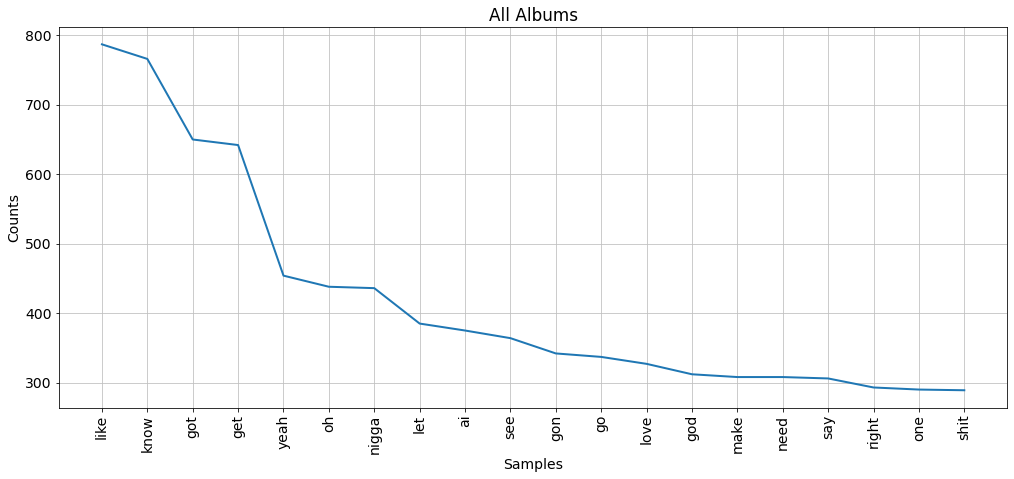

<AxesSubplot:title={'center':'All Albums'}, xlabel='Samples', ylabel='Counts'>

In [7]:
all_tokens = df_lyrics['lyrics_lem'].apply(pd.Series).stack()

freq_dist = nltk.probability.FreqDist(all_tokens)
for punc in string.punctuation:
    del freq_dist[punc]
freq_dist.plot(20, cumulative=False, title="All Albums")

Since we're looking towards difference between albums, we'll also create distributions grouped by album.

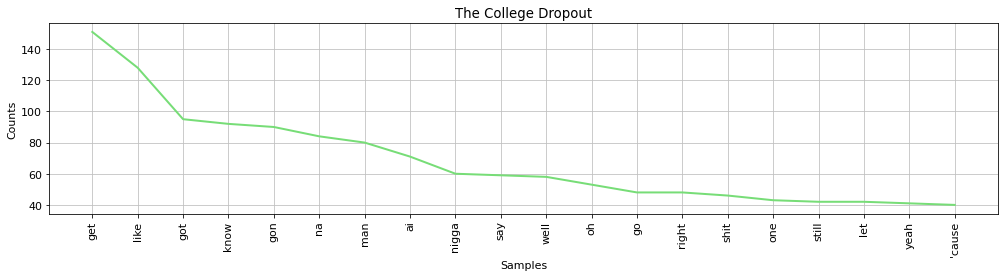

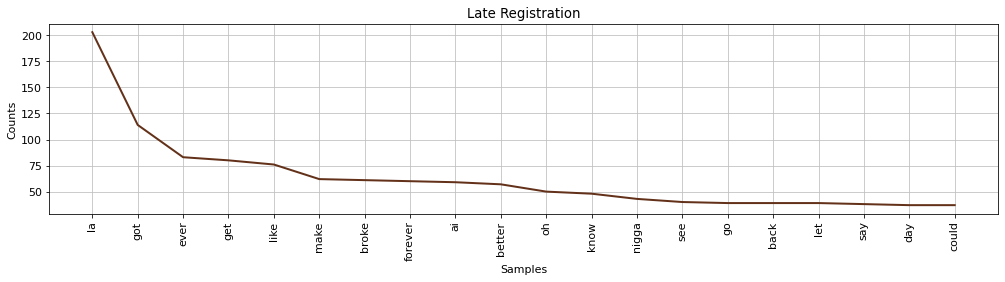

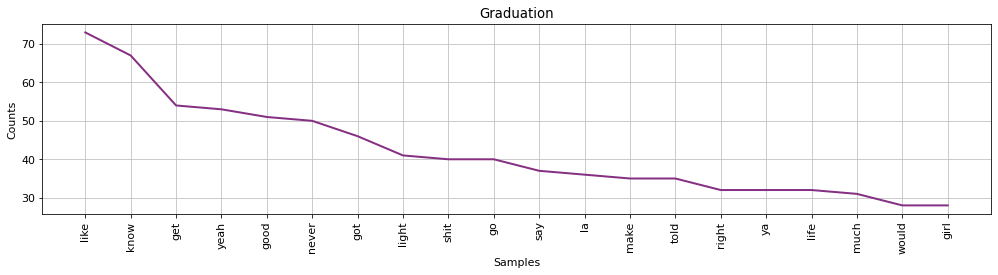

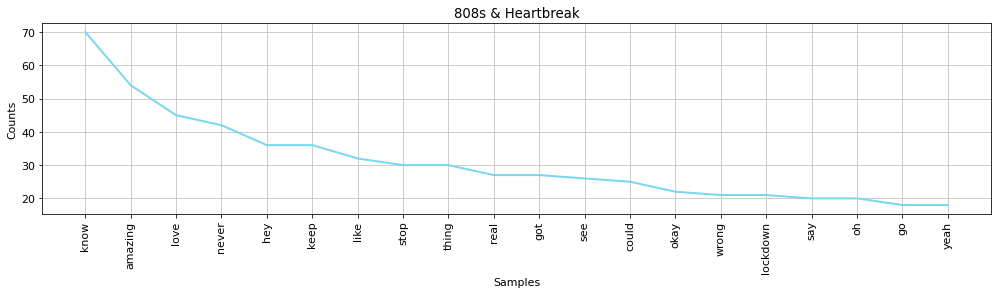

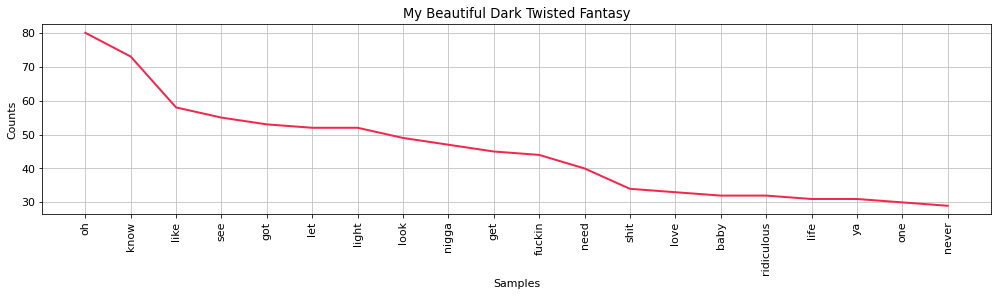

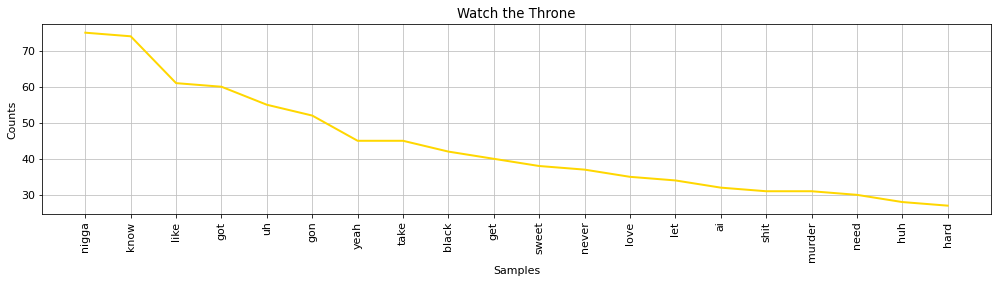

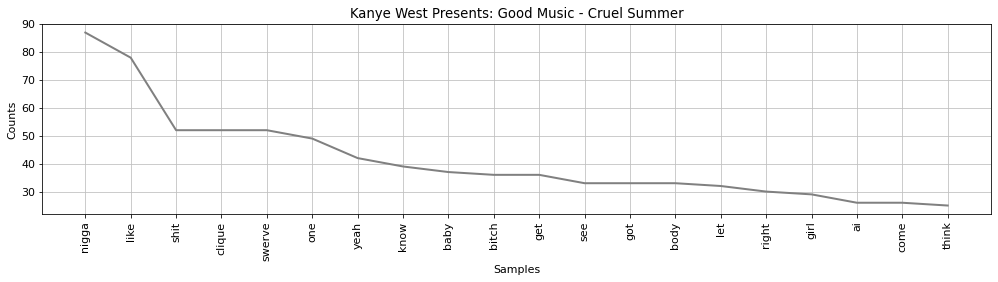

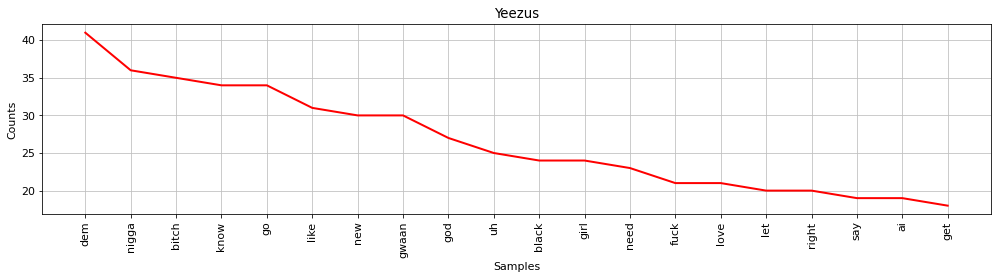

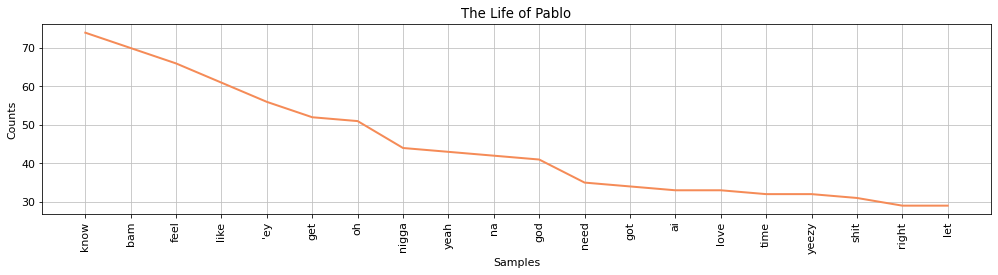

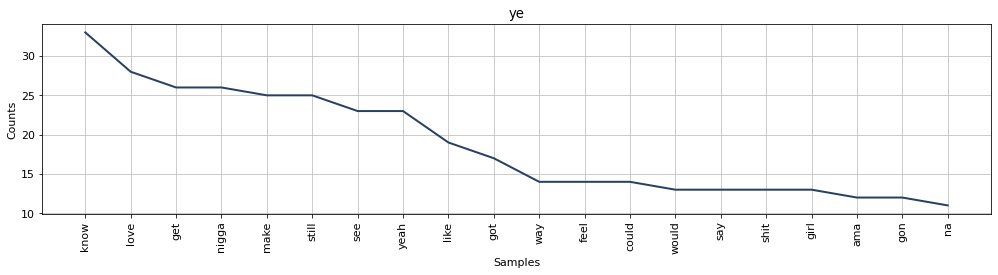

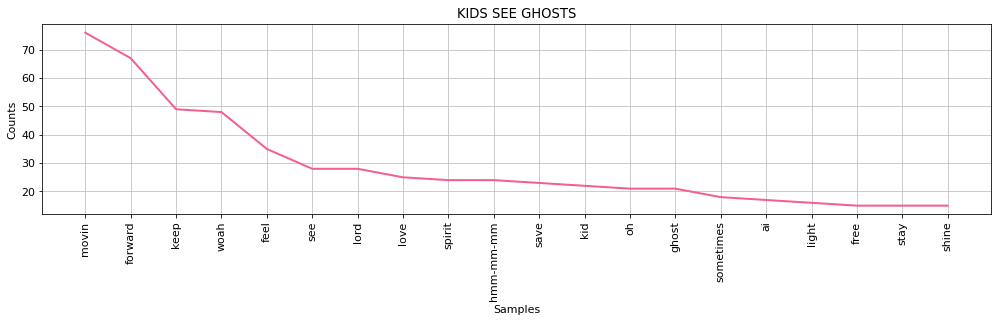

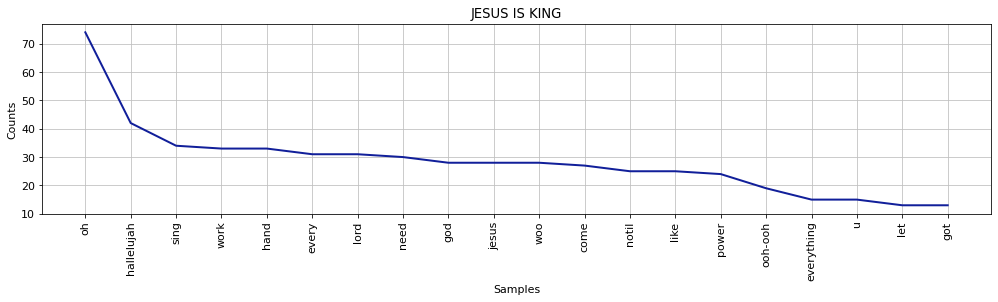

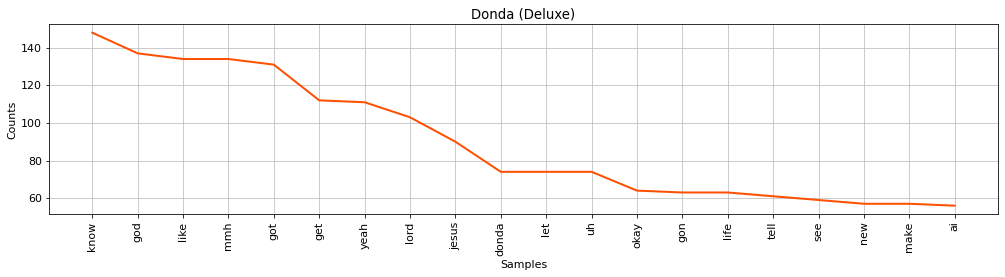

In [8]:
plt.rcParams['figure.figsize'] = (17, 3.5)
plt.rcParams.update({'font.size': 11})
colors = ['#77DD77', '#633119', '#853082', '#7AD7F0', '#f2274c', '#ffd700', '#808080', 
          '#fe0000', '#f58b57', '#284061', '#F25E95', '#111F9A', '#FE5000']

for i, album in enumerate(df_lyrics['Album'].unique()):
    tokens = df_lyrics[df_lyrics['Album'] == album]['lyrics_lem'].apply(pd.Series).stack()
    freq_dist = nltk.probability.FreqDist(tokens)
    for punc in string.punctuation:
        del freq_dist[punc]
    ax1 = freq_dist.plot(20, cumulative=False, title=album, color=colors[i])

plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})

It's difficult to glean too much information from these distributions, as a majority of the words are quite common and don't convey too much information without context. However, it is worth noting that, towards the last three albums and "808's & Heartbreak", there is a noticeable shift in lexical choice, as they are the only albums within his discography that do not feature profanity or explicit language as their top 20 most used words. 

### 1) Lexical Diversity

Modern hip hop is often criticized for its departure from complex lyricism that old-school hip hop often featured. One of the most blatant offenders of this is Lil Pump's "Gucci Gang," which repeats the titular phrase in the song over fifty times. While Kanye West is not likely to reach repetition to that extent, it would be interesting to see whether the lyrical content of his music has gotten simpler and more repetitive given his longstanding career. In order to analyze this, we'll explore the lexical diversity of his lyrics by measuring each song's type-token ratio.

Type-token ratio measures the ratio of unique word stems (types) to the total number of the words (tokens). The logic behind this metric is that songs that are lyrically complex will have a wider vocabulary and will not repeat phrases as often. This would, in turn, increase the number of unique words contained within the body of text, and therefore increase the type-token ratio. Here, we make the conscious decision to exclude stopwords from our analysis in order to produce clearer results, as stopwords can potentially create noise within the data and deflate a song's type-token ratio.

In [9]:
def calculate_ttr(lyrics):
    for punc in string.punctuation:
        lyrics = list(filter(lambda x: x != punc, lyrics))
    return len(set(lyrics)) / len(lyrics)

df_lyrics['ttr'] = df_lyrics['lyrics_lem'].apply(calculate_ttr)
df_lyrics.head()

,Track Name,Album,Lyrics,lyrics_token,lyrics_stop,lyrics_lem,ttr
0,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a...","[kanye, ,, can, i, talk, to, you, for, a, minu...","[kanye, talk, minute, ?, faculty, members, won...","[kanye, talk, minute, ?, faculty, member, wond...",0.833333
1,We Don't Care,The College Dropout,"\nOh, yeah\nI got the perfect song for the kid...","[oh, ,, yeah, i, got, the, perfect, song, for,...","[oh, yeah, got, perfect, song, kids, sing, peo...","[oh, yeah, got, perfect, song, kid, sing, peop...",0.537838
2,Graduation Day,The College Dropout,"\nWhat in the fuck was that, Kanye?! I told yo...","[what, in, the, fuck, was, that, ,, kanye, ?, ...","[fuck, kanye, ?, !, told, shit, kids, !, give,...","[fuck, kanye, ?, !, told, shit, kid, !, give, ...",0.734043
3,All Falls Down,The College Dropout,"\nOh, when it all, it all falls down\nYeah, th...","[oh, ,, when, it, all, ,, it, all, falls, down...","[oh, falls, yeah, real, one, baby, tellin, fal...","[oh, fall, yeah, real, one, baby, tellin, fall...",0.594030
4,I'll Fly Away,The College Dropout,"\nOne glad morning, when this life is over, I ...","[one, glad, morning, ,, when, this, life, is, ...","[one, glad, morning, life, fly, away, land, jo...","[one, glad, morning, life, fly, away, land, jo...",0.640000


In [10]:
df_lyrics.describe()

,ttr
count,200.000000
mean,0.536329
std,0.131573
min,0.016949
25%,0.460622
50%,0.546518
75%,0.607146
max,0.882353


From this, we can see that a large majority of the data is located at the center, considering how close the 1st and 3rd quartile are to the median. There does seem to be some significant outliers given how far the min and max are from the medium and mean. Let's check them out.

In [11]:
df_lyrics[df_lyrics['ttr'] < 0.25]

,Track Name,Album,Lyrics,lyrics_token,lyrics_stop,lyrics_lem,ttr
34,Skit #2,Late Registration,"We broke, broke broke phi broke\nWe ai not got...","[we, broke, ,, broke, broke, phi, broke, we, a...","[broke, broke, broke, phi, broke, ai, got, bro...","[broke, broke, broke, phi, broke, ai, got, bro...",0.191176
159,Reborn,KIDS SEE GHOSTS,"\nHmm, I am wide awake, I’m wide awake\nI am w...","[hmm, ,, i, am, wide, awake, ,, i, ’, m, wide,...","[hmm, wide, awake, ’, wide, awake, wide, awake...","[hmm, wide, awake, ’, wide, awake, wide, awake...",0.235616
162,Every Hour,JESUS IS KING,"\nSing every hour (Every hour, notil the powe...","[sing, every, hour, (, every, hour, ,, notil, ...","[sing, every, hour, every, hour, notil, power,...","[sing, every, hour, every, hour, notil, power,...",0.130841
173,Donda Chant,Donda (Deluxe),"\nDonda, Donda, Donda, Donda, Donda, Donda\nDo...","[donda, ,, donda, ,, donda, ,, donda, ,, donda...","[donda, donda, donda, donda, donda, donda, don...","[donda, donda, donda, donda, donda, donda, don...",0.016949


In [12]:
df_lyrics[df_lyrics['ttr'] > 0.75]

,Track Name,Album,Lyrics,lyrics_token,lyrics_stop,lyrics_lem,ttr
0,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a...","[kanye, ,, can, i, talk, to, you, for, a, minu...","[kanye, talk, minute, ?, faculty, members, won...","[kanye, talk, minute, ?, faculty, member, wond...",0.833333
13,School Spirit (Skit 1),The College Dropout,"\nNow beat that!\nAnd your mother is saying ""G...","[now, beat, that, !, and, your, mother, is, sa...","[beat, !, mother, saying, go, college, finish,...","[beat, !, mother, saying, go, college, finish,...",0.819820
16,Lil' Jimmy (Skit),The College Dropout,"Hey Jimmy, where you going?\nI do not know whe...","[hey, jimmy, ,, where, you, going, ?, i, do, n...","[hey, jimmy, going, ?, know, goin', dad, died,...","[hey, jimmy, going, ?, know, goin', dad, died,...",0.771930
29,My Way Home,Late Registration,\n\nYeah\nI am on my way home\n\nThey say home...,"[yeah, i, am, on, my, way, home, they, say, ho...","[yeah, way, home, say, home, hate, dome, fate,...","[yeah, way, home, say, home, hate, dome, fate,...",0.829060
43,Back to Basics,Late Registration,"\nUh, uh, let is take it back to basics\nWhen ...","[uh, ,, uh, ,, let, is, take, it, back, to, ba...","[uh, uh, let, take, back, basics, shit, gets, ...","[uh, uh, let, take, back, basic, shit, get, wo...",0.753846
87,Who Will Survive In America,My Beautiful Dark Twisted Fantasy,\nUs living as we do upside-down\nAnd the new ...,"[us, living, as, we, do, upside-down, and, the...","[us, living, upside-down, new, word, revolutio...","[u, living, upside-down, new, word, revolution...",0.841667
92,Otis,Watch the Throne,"\nIt makes it easier, easier to bear\nYou will...","[it, makes, it, easier, ,, easier, to, bear, y...","[makes, easier, easier, bear, regret, girls, f...","[make, easier, easier, bear, regret, girl, for...",0.818966
140,Frank's Track,The Life of Pablo,"\nThe rings all ringed out\nBurn out, cave in\...","[the, rings, all, ringed, out, burn, out, ,, c...","[rings, ringed, burn, cave, blackened, dark, m...","[ring, ringed, burn, cave, blackened, dark, mi...",0.882353
165,Closed on Sunday,JESUS IS KING,"\nClosed on Sunday, you are my Chick-fil-A\nCl...","[closed, on, sunday, ,, you, are, my, chick-fi...","[closed, sunday, chick-fil-a, closed, sunday, ...","[closed, sunday, chick-fil-a, closed, sunday, ...",0.800000
166,On God,JESUS IS KING,"\nYo, Pi'erre, yo, Pi'erre\n\n""How you get so ...","[yo, ,, pi'erre, ,, yo, ,, pi'erre, '', how, y...","[yo, pi'erre, yo, pi'erre, get, much, favor, s...","[yo, pi'erre, yo, pi'erre, get, much, favor, s...",0.859155


There doesn't seem to anything here that looks off and would be worth removing to the point where it would significantly affect results. While one would expect shorter songs to be less likely to be repetitive due to less opportunity to repeat lyrics, this does not always seem to be the case, as we see 'Skit #2' and 'Donda Chant' near the lowest values, both of which are songs that are shorter than one minute.

Let's see how it breaks down by album.

In [13]:
df_lyrics.groupby('Album', sort=False).describe()

ttr                      \
                                               count      mean       std   
Album                                                                      
The College Dropout                             22.0  0.602287  0.119904   
Late Registration                               23.0  0.550542  0.131463   
Graduation                                      15.0  0.505870  0.098909   
808s & Heartbreak                               12.0  0.407002  0.075512   
My Beautiful Dark Twisted Fantasy               13.0  0.550221  0.140369   
Watch the Throne                                16.0  0.601671  0.112540   
Kanye West Presents: Good Music - Cruel Summer  12.0  0.550751  0.079029   
Yeezus                                          10.0  0.567511  0.073665   
The Life of Pablo                               20.0  0.539149  0.128210   
ye                                               7.0  0.551147  0.060098   
KIDS SEE GHOSTS                                  7.0  0.504971  0.167422   
JESUS IS KING                                   11.0  0.522974  0.221720   
Donda (Deluxe)                                  32.0  0.496522  0.135141   

                                                                              \
                                                     min       25%       50%   
Album                                                                          
The College Dropout                             0.363785  0.539111  0.599989   
Late Registration                               0.191176  0.500598  0.560656   
Graduation                                      0.256148  0.435768  0.554585   
808s & Heartbreak                               0.276190  0.360700  0.409944   
My Beautiful Dark Twisted Fantasy               0.365854  0.470588  0.551971   
Watch the Throne                                0.337500  0.534320  0.621209   
Kanye West Presents: Good Music - Cruel Summer  0.439759  0.496279  0.542614   
Yeezus                                          0.445415  0.518419  0.587582   
The Life of Pablo                               0.272727  0.474439  0.548894   
ye                                              0.460000  0.517106  0.558559   
KIDS SEE GHOSTS                                 0.235616  0.417292  0.536232   
JESUS IS KING                                   0.130841  0.384691  0.510460   
Donda (Deluxe)                                  0.016949  0.455243  0.513466   

                                                                    
                                                     75%       max  
Album                                                               
The College Dropout                             0.654574  0.833333  
Late Registration                               0.612162  0.829060  
Graduation                                      0.563478  0.612167  
808s & Heartbreak                               0.457177  0.511628  
My Beautiful Dark Twisted Fantasy               0.589404  0.841667  
Watch the Throne                                0.666884  0.818966  
Kanye West Presents: Good Music - Cruel Summer  0.582438  0.726950  
Yeezus                                          0.593208  0.666667  
The Life of Pablo                               0.606938  0.882353  
ye                                              0.585063  0.635135  
KIDS SEE GHOSTS                                 0.615442  0.697479  
JESUS IS KING                                   0.681313  0.859155  
Donda (Deluxe)                                  0.571062  0.700375

It is interesting to note that the data consistently stays around a TTR value of 0.5 both in mean and median, with the only significant deviation being in "808's & Heartbreaks." We'll proceed with a visualization.

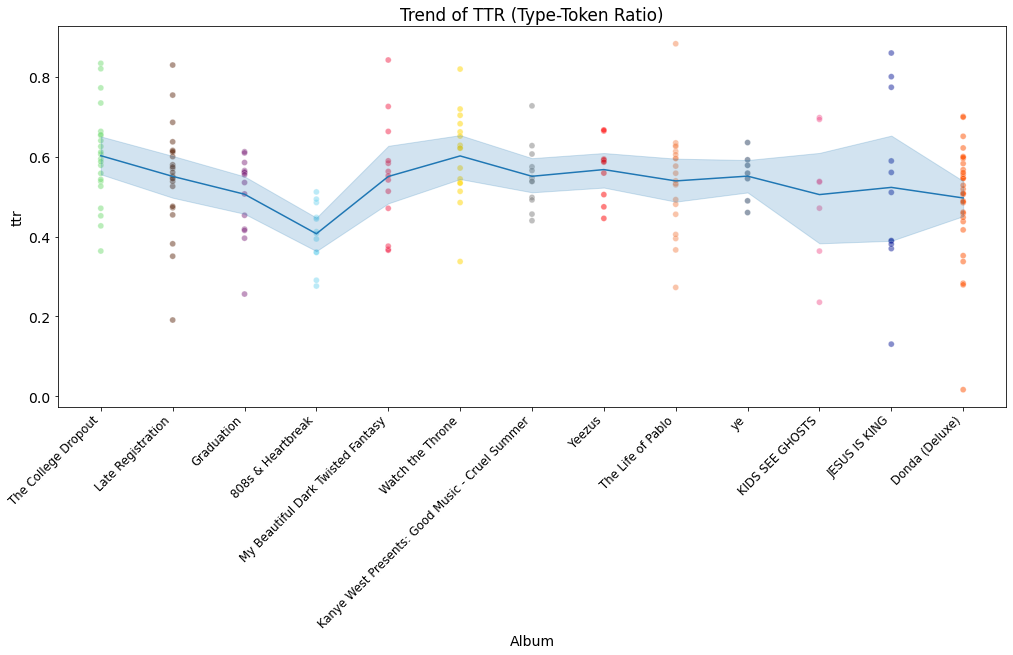

In [14]:
ax = sns.scatterplot(data=df_lyrics, x='Album', y='ttr', hue='Album',
                     palette=sns.color_palette(colors, 13), legend=False, alpha=0.5)
ax.set(title="Trend of TTR (Type-Token Ratio)")
ax.set_xticklabels(
    labels=df_lyrics['Album'].unique(),
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
ax2 = sns.lineplot(data=df_lyrics, x='Album', y='ttr')

Here, we surprisingly see an extreme consistency among the amount of repetition that is present in his songs. As could be seen in the descriptive statistics calculated earlier, the line is nearly horizontal across a 0.5 type-token ratio, even across a 13 album career. The fact that there is a dip towards "Graduation" and "808's & Heartbreak' is not surprising though, as these two albums had a far more pop aesthetic than the albums that trailed and followed it. 

The Mann-Kendall test assesses the trend over time and whether this change is significant enough. Howver it does not take into account the magnitude of the change. By performing Mann Kendall-test (MKT) on Kanye West's Type-Token Ratio (TTR) and song attributes, it provides evidence and support of previous observations. We will use the library 'pymannkendall' as a tool to help the analysis.


To perform the MKT, there needs to be the null hypothesis is that there is NO trend in the dataset concerning the TTR.
Alternatively, the hypothesis that a trend does exists can be made. 

Null Hypothesis (H<sub>0</sub>): No trend   
Alternate Hypothesis (H<sub>A</sub>) : There is a negative trend in the TTR of Ye's discography.

There are certain conditions that need to be considered to perform the MKT:
 - Data must be consistently collected
 - Data has no covariates
 - The sample collection, handling, and measurement methods provide unbiased and representative observations of the underlying populations over time.

Since the dataset we are using satisfies these conditions, the MKT can be performed.

In [15]:
MKT_ttr = mk.original_test(df_lyrics['ttr'])
MKT_ttr_test = pd.DataFrame(columns = [" ", "Trend", "P-Value", "Slope", "Intercept"])

MK_row = {" ": 'ttr', "Trend":MKT_ttr[0], "P-Value":MKT_ttr[2], "Slope":MKT_ttr[7], "Intercept":MKT_ttr[8]}
MKT_ttr_test = MKT_ttr_test.append(MK_row, ignore_index = True)
MKT_ttr_test

,,Trend,P-Value,Slope,Intercept
0,ttr,no trend,0.071089,-0.000256,0.572035


As it can be seen with the results of the MKT, there is no significant trend (the p-value being greater than 0.05) in the dataset concerning the TTR thus proving the null hypothesis to be true.

### 2) Sentiment Analysis

Next, we'll look to explore trends in sentiment across all his albums. Sentiment analysis attempts to parse the emotional content of a body of text and output a quantifiable score. Here, we'll take a lexicon-based approach and use nltk's built-in VADER, which is a pre-trained sentiment model often used for analyzing social media. This application is quite close to ours, as the informal nature of his lyrics and heavy use of slang should closely resemble what is often written in social media.

In [16]:
vader = SentimentIntensityAnalyzer()
df_sentiment = pd.DataFrame()
lyrics_list = list(df_lyrics['Lyrics'].values)

for lyrics in lyrics_list:
    row = vader.polarity_scores(lyrics)
    row['song_name'] = df_lyrics.loc[df_lyrics['Lyrics'] == lyrics]['Track Name'].item()
    row['album'] = df_lyrics.loc[df_lyrics['Lyrics'] == lyrics]['Album'].item()
    row['lyrics'] = lyrics
    df_sentiment = df_sentiment.append(row, ignore_index=True)
    
df_sentiment

,neg,neu,pos,compound,song_name,album,lyrics
0,0.000,0.875,0.125,0.8577,Intro,The College Dropout,"\nKanye, can I talk to you for a minute?\nMe a..."
1,0.118,0.816,0.066,-0.9923,We Don't Care,The College Dropout,"\nOh, yeah\nI got the perfect song for the kid..."
2,0.137,0.801,0.062,-0.9490,Graduation Day,The College Dropout,"\nWhat in the fuck was that, Kanye?! I told yo..."
3,0.075,0.802,0.123,0.9897,All Falls Down,The College Dropout,"\nOh, when it all, it all falls down\nYeah, th..."
4,0.075,0.651,0.274,0.8860,I'll Fly Away,The College Dropout,"\nOne glad morning, when this life is over, I ..."
...,...,...,...,...,...,...,...
195,0.099,0.797,0.104,-0.8083,Jesus Lord,Donda (Deluxe),\nTell me if you know someone that needs (Jesu...
196,0.076,0.781,0.144,0.9727,Ok Ok pt 2 (Deluxe Version),Donda (Deluxe),"\nOkay, now they got me wanna rap again\nHeale..."
197,0.028,0.884,0.088,0.9837,Junya pt 2,Donda (Deluxe),"\nJunya Watanabe on my wri', wri'\nJunya Watan..."
198,0.098,0.765,0.137,0.9580,Jail pt 2,Donda (Deluxe),\nTake what you want\nTake everything\nTake wh...


In terms of interpretation, VADER works by calculating three scores that sum to 1: positivity (pos), negativity (neg), and neutrality (neu). It then creates a composite score based off these three scores, compound, which ranges from -1 to 1. By this logic, any score close to 0 is neutral, anything above 0 is some degree of positive, and anything below 0 is some degree of negative.

Let's see how the data looks for the collective whole.

In [17]:
df_sentiment.describe()

,neg,neu,pos,compound
count,200.000000,200.000000,200.000000,200.000000
mean,0.102345,0.763785,0.133860,0.232681
std,0.065797,0.088361,0.077428,0.902053
min,0.000000,0.351000,0.000000,-0.999900
25%,0.058750,0.719750,0.086750,-0.964000
50%,0.089500,0.774500,0.123000,0.901950
75%,0.135000,0.815250,0.158500,0.992275
max,0.423000,1.000000,0.604000,0.999900


The most notable statistic here is the one's representing spread. Although the mean of 0.24 suggests that his music leans towards positive, the spread of the data is evidently massive, considering how high the standard deviation and interquartile range are, relatively speaking.

Now, let's see how it looks by album.

In [18]:
df_sentiment[['compound', 'album']].groupby('album', sort=False).describe()

compound                      \
                                                  count      mean       std   
album                                                                         
The College Dropout                                22.0  0.260264  0.883348   
Late Registration                                  23.0  0.130309  0.931396   
Graduation                                         15.0  0.456567  0.904850   
808s & Heartbreak                                  12.0  0.441925  0.873437   
My Beautiful Dark Twisted Fantasy                  13.0 -0.321177  0.886063   
Watch the Throne                                   16.0 -0.249088  0.908607   
Kanye West Presents: Good Music - Cruel Summer     12.0  0.092242  0.971926   
Yeezus                                             10.0 -0.756420  0.618533   
The Life of Pablo                                  20.0  0.368235  0.903214   
ye                                                  7.0 -0.334443  0.933330   
KIDS SEE GHOSTS                                     7.0  0.429286  0.826275   
JESUS IS KING                                      11.0  0.874064  0.294703   
Donda (Deluxe)                                     32.0  0.707387  0.606090   

                                                                           \
                                                   min       25%      50%   
album                                                                       
The College Dropout                            -0.9997 -0.939525  0.83310   
Late Registration                              -0.9921 -0.924100  0.72030   
Graduation                                     -0.9991 -0.012100  0.97820   
808s & Heartbreak                              -0.9981  0.049450  0.97225   
My Beautiful Dark Twisted Fantasy              -0.9997 -0.996400 -0.98320   
Watch the Throne                               -0.9991 -0.985000 -0.81420   
Kanye West Presents: Good Music - Cruel Summer -0.9999 -0.996725  0.65285   
Yeezus                                         -0.9992 -0.995700 -0.98450   
The Life of Pablo                              -0.9973 -0.922750  0.93885   
ye                                             -0.9983 -0.990850 -0.93790   
KIDS SEE GHOSTS                                -0.9921  0.005000  0.99420   
JESUS IS KING                                   0.0000  0.923750  0.97900   
Donda (Deluxe)                                 -0.8456  0.926575  0.97940   

                                                                  
                                                     75%     max  
album                                                             
The College Dropout                             0.954900  0.9994  
Late Registration                               0.989400  0.9990  
Graduation                                      0.990400  0.9985  
808s & Heartbreak                               0.995750  0.9996  
My Beautiful Dark Twisted Fantasy               0.530600  0.9965  
Watch the Throne                                0.833950  0.9985  
Kanye West Presents: Good Music - Cruel Summer  0.950975  0.9986  
Yeezus                                         -0.966925  0.9765  
The Life of Pablo                               0.991000  0.9977  
ye                                              0.289100  0.9986  
KIDS SEE GHOSTS                                 0.996750  0.9994  
JESUS IS KING                                   0.995600  0.9999  
Donda (Deluxe)                                  0.995325  0.9992

Here, we can see that the values vary pretty highly from song to song and album to album, so it might be helpful to look at the distribution of songs within each album.

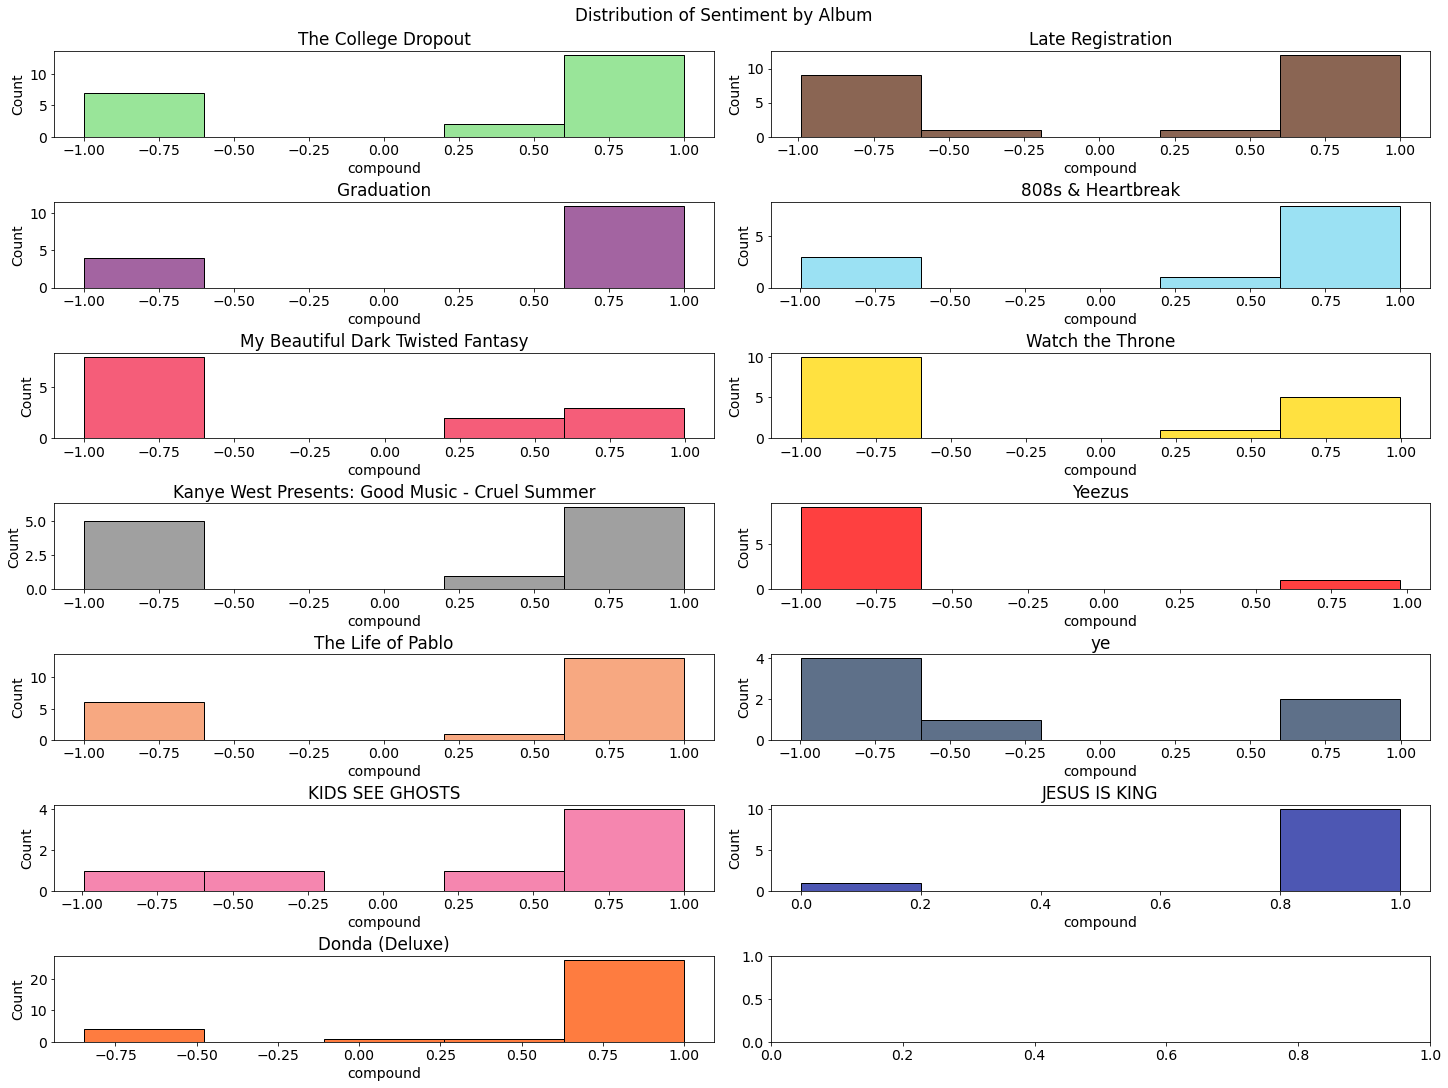

In [19]:
fig, axes = plt.subplots(7, 2, figsize=(20,15), constrained_layout=True)
axes = axes.flatten()
fig.suptitle('Distribution of Sentiment by Album')
for i, album in enumerate(df_lyrics['Album'].unique()):
    sns.histplot(data=df_sentiment[df_sentiment['album'] == album], x='compound', ax=axes[i], color=colors[i], bins=5)
    axes[i].set_title(album)

From this, we can see that for most albums, there are either songs that are extremely positive or extremely negative, with little inbetween. Logically, this must be why the spread is so high for each of the albums.

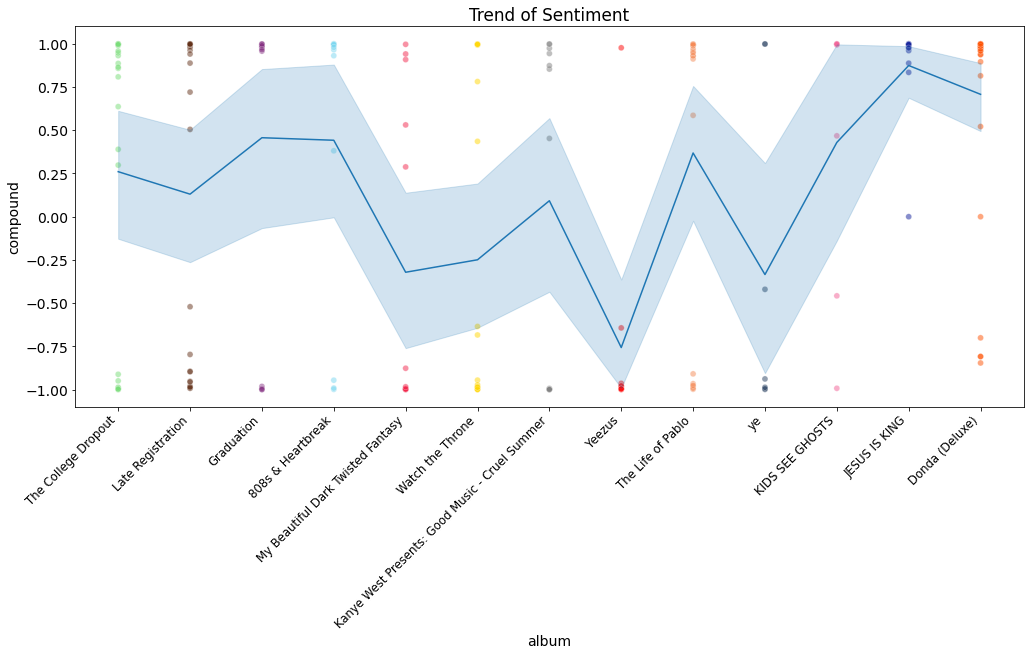

In [20]:
ax = sns.scatterplot(data=df_sentiment, x='album', y='compound', hue='album', 
                     palette=sns.color_palette(colors, 13), legend=False, alpha=0.5)
ax.set(title="Trend of Sentiment")
ax.set_xticklabels(
    labels=df_lyrics['Album'].unique(),
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
ax2 = sns.lineplot(data=df_sentiment, x='album', y='compound')

This is a very interesting graph. Looking at the big picture, the trend does seem accurate from my listening experience. As for specific albums, some do feel very accurate, such as in "Yeezus", "JESUS IS KING", and "Donda (Deluxe)." However, there are many parts in which it completely diverts from expectations. Particularly, "808's & Heartbreaks' is an album known for a distinct departure from his usual style, as it was inspired by the breakup of his fiancée and the death of his mother. As a result, he explores the use of minimalistic autotune in order to convey pain, and much of the lyrics are based on themes of heartbreak and loss. Following this, we find it quite surprising how it has such a high score. On the other hand, many of his other albums, which did not feel quite as negative, consistently have songs that touch a value of -1.

One interesting thing to explore would be to somehow lower the weight that profanity impacts the analysis, as there is a possibility that its presence is skewing the results. This is because profanity is generally seen with a negative connotation, which would likely lower a song's compound VADER score. However, it is often the case in hip hop culture that artists use profanity without complete negative intention, and this is somewhat true with Kanye West. While VADER does consider context of the profanity, we will proceed to see if it helps produce better results.

Here, we grab a list of profanity words from an online source, and if the word is in VADER's lexicon, then its weight is halved.

In [21]:
response = urlopen('https://raw.githubusercontent.com/zacanger/profane-words/master/words.json')
swear_words = json.loads(response.read())

updated_vals = {}

for swear_word in swear_words:
    if (vader.lexicon.get(swear_word)):
        updated_vals[swear_word] = vader.lexicon.get(swear_word) / 2
        
vader.lexicon.update(updated_vals)

From here, we proceed with pretty much the same steps, using a different weight of the lexicon.

In [22]:
df_clean = pd.DataFrame()
lyrics_list = list(df_lyrics['Lyrics'].values)

for lyrics in lyrics_list:
    row = vader.polarity_scores(lyrics)
    row['song_name'] = df_lyrics.loc[df_lyrics['Lyrics'] == lyrics]['Track Name'].item()
    row['album'] = df_lyrics.loc[df_lyrics['Lyrics'] == lyrics]['Album'].item()
    row['lyrics'] = lyrics
    df_clean = df_clean.append(row, ignore_index=True)

In [23]:
df_clean.describe()

,neg,neu,pos,compound
count,200.000000,200.000000,200.000000,200.000000
mean,0.091545,0.773495,0.135035,0.352516
std,0.057556,0.086120,0.077385,0.860793
min,0.000000,0.351000,0.000000,-0.999600
25%,0.053000,0.733500,0.088000,-0.757375
50%,0.080000,0.782500,0.124000,0.953800
75%,0.117250,0.824250,0.161000,0.993700
max,0.421000,1.000000,0.604000,0.999900


In [24]:
df_clean[['compound', 'album']].groupby('album', sort=False).describe()

compound                      \
                                                  count      mean       std   
album                                                                         
The College Dropout                                22.0  0.331182  0.882184   
Late Registration                                  23.0  0.240870  0.902330   
Graduation                                         15.0  0.478760  0.879559   
808s & Heartbreak                                  12.0  0.442408  0.873762   
My Beautiful Dark Twisted Fantasy                  13.0 -0.119015  0.984666   
Watch the Throne                                   16.0  0.071119  0.914999   
Kanye West Presents: Good Music - Cruel Summer     12.0  0.297550  0.954302   
Yeezus                                             10.0 -0.523410  0.797602   
The Life of Pablo                                  20.0  0.572015  0.760711   
ye                                                  7.0 -0.210857  0.910641   
KIDS SEE GHOSTS                                     7.0  0.600157  0.738983   
JESUS IS KING                                      11.0  0.874073  0.294707   
Donda (Deluxe)                                     32.0  0.733731  0.572472   

                                                                           \
                                                   min       25%      50%   
album                                                                       
The College Dropout                            -0.9993 -0.782725  0.89095   
Late Registration                              -0.9917 -0.809950  0.89780   
Graduation                                     -0.9987  0.118850  0.98500   
808s & Heartbreak                              -0.9981  0.049450  0.97515   
My Beautiful Dark Twisted Fantasy              -0.9993 -0.990900 -0.97690   
Watch the Throne                               -0.9972 -0.947425  0.30890   
Kanye West Presents: Good Music - Cruel Summer -0.9996 -0.975025  0.94310   
Yeezus                                         -0.9972 -0.981525 -0.94160   
The Life of Pablo                              -0.9936  0.676350  0.97545   
ye                                             -0.9952 -0.936800 -0.72680   
KIDS SEE GHOSTS                                -0.9921  0.602400  0.99490   
JESUS IS KING                                   0.0000  0.923750  0.97900   
Donda (Deluxe)                                 -0.8083  0.933175  0.98125   

                                                                  
                                                     75%     max  
album                                                             
The College Dropout                             0.989550  0.9995  
Late Registration                               0.993400  0.9991  
Graduation                                      0.993350  0.9985  
808s & Heartbreak                               0.995750  0.9996  
My Beautiful Dark Twisted Fantasy               0.948600  0.9972  
Watch the Throne                                0.967150  0.9987  
Kanye West Presents: Good Music - Cruel Summer  0.993650  0.9986  
Yeezus                                         -0.550150  0.9793  
The Life of Pablo                               0.993250  0.9981  
ye                                              0.560500  0.9986  
KIDS SEE GHOSTS                                 0.997050  0.9994  
JESUS IS KING                                   0.995600  0.9999  
Donda (Deluxe)                                  0.995325  0.9993

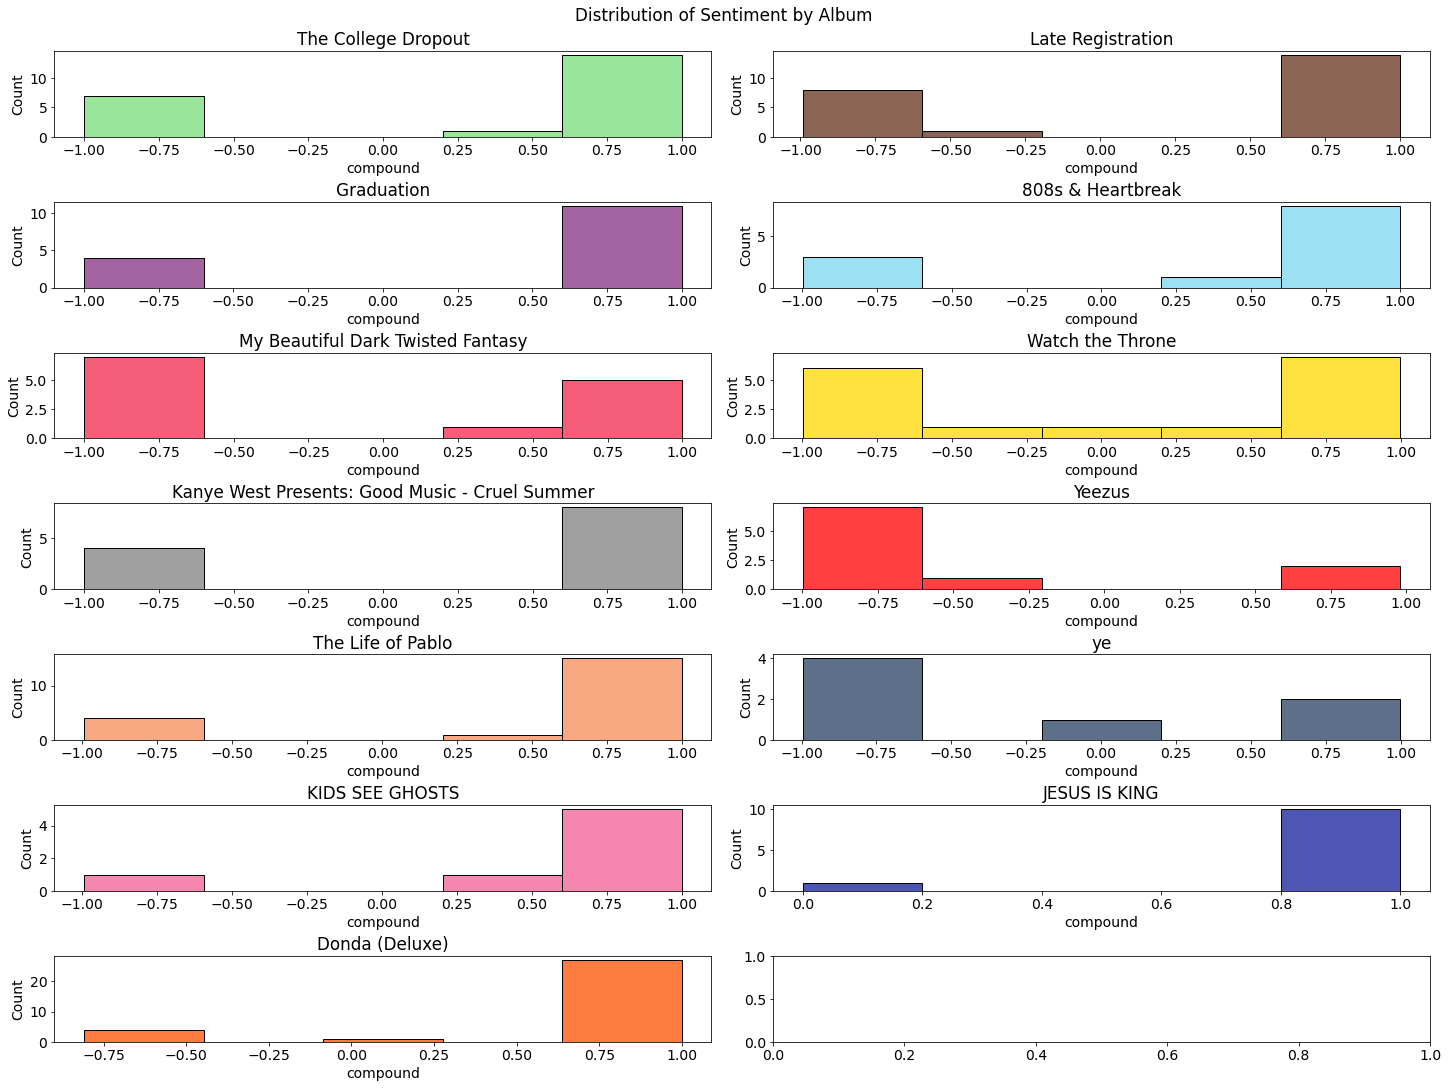

In [25]:
fig, axes = plt.subplots(7, 2, figsize=(20,15), constrained_layout=True)
axes = axes.flatten()
fig.suptitle('Distribution of Sentiment by Album')
for i, album in enumerate(df_lyrics['Album'].unique()):
    sns.histplot(data=df_clean[df_clean['album'] == album], x='compound', ax=axes[i], color=colors[i], bins=5)
    axes[i].set_title(album)

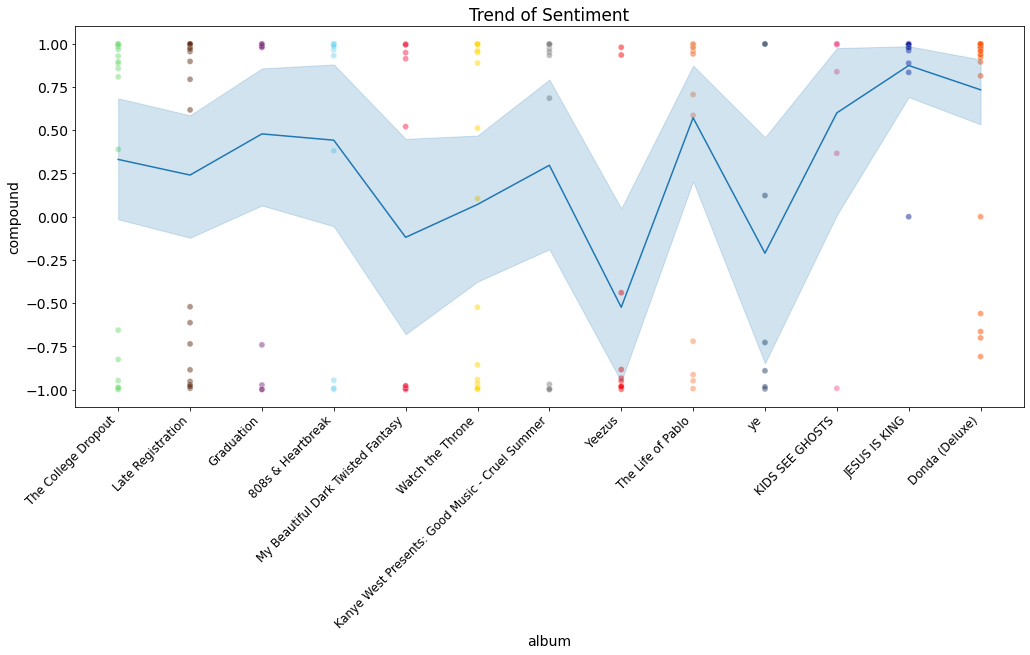

In [26]:
ax = sns.scatterplot(data=df_clean, x='album', y='compound', hue='album', 
                     palette=sns.color_palette(colors, 13), legend=False, alpha=0.5)
ax.set(title="Trend of Sentiment")
ax.set_xticklabels(
    labels=df_lyrics['Album'].unique(),
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
ax2 = sns.lineplot(data=df_clean, x='album', y='compound')

From a comparison of the two graphs, the change increases the mean sentiment score by quite a bit (as expected), but changes very little in terms of the overall trend of the graph. As a result, it seems like profanity does not seem to be skewing the results towards what is unexpected, and any differences between our perception of the music is likely due to other characteristics of the music.

This does introduce a few questions though. We know that lowering the degree by which profanity affects VADER's analysis does not change the overall trend of the graph, which means that VADER does take into account the context of profanity, and that many of Kanye's songs are just intrinsically negative regardless of the profanity. However, it may be interesting to further explore this link between sentiment and profanity, which we saw a bit of by initially examining the word frequency distributions. Essentially, taking into account the fact that Kanye West curses even in positive songs, is the sentiment of Kanye West's songs correlated to the amount of profanity?

The raw count of profanity will be skewed towards longer songs and albums, so we'll instead look the proportion of his music that is profanity. We'll look into this by simply counting how many profane words are in each of his lemmatized songs and dividing that by the total word count.

In [27]:
def count_prof(lyrics):
    count = 0
    for lyric in lyrics:
        if lyric in swear_words:
            count += 1
    return count / len(lyrics)
    
df_prof = df_lyrics[['Track Name', 'Album', 'lyrics_lem']]
df_prof['prop_profanity'] = df_prof['lyrics_lem'].apply(count_prof)
df_prof['prop_profanity * 10'] = df_prof['lyrics_lem'].apply(lambda x : 10 * count_prof(x))
df_prof

,Track Name,Album,lyrics_lem,prop_profanity,prop_profanity * 10
0,Intro,The College Dropout,"[kanye, talk, minute, ?, faculty, member, wond...",0.000000,0.000000
1,We Don't Care,The College Dropout,"[oh, yeah, got, perfect, song, kid, sing, peop...",0.031915,0.319149
2,Graduation Day,The College Dropout,"[fuck, kanye, ?, !, told, shit, kid, !, give, ...",0.064815,0.648148
3,All Falls Down,The College Dropout,"[oh, fall, yeah, real, one, baby, tellin, fall...",0.017595,0.175953
4,I'll Fly Away,The College Dropout,"[one, glad, morning, life, fly, away, land, jo...",0.000000,0.000000
...,...,...,...,...,...
200,Jesus Lord,Donda (Deluxe),"[tell, know, someone, need, jesus, lord, lot, ...",0.009485,0.094851
201,Ok Ok pt 2 (Deluxe Version),Donda (Deluxe),"[okay, got, wan, na, rap, healed, wound, stab,...",0.000000,0.000000
202,Junya pt 2,Donda (Deluxe),"[junya, watanabe, wri, wri', junya, watanabe, ...",0.003003,0.030030
203,Jail pt 2,Donda (Deluxe),"[take, want, take, everything, take, want, tak...",0.012158,0.121581


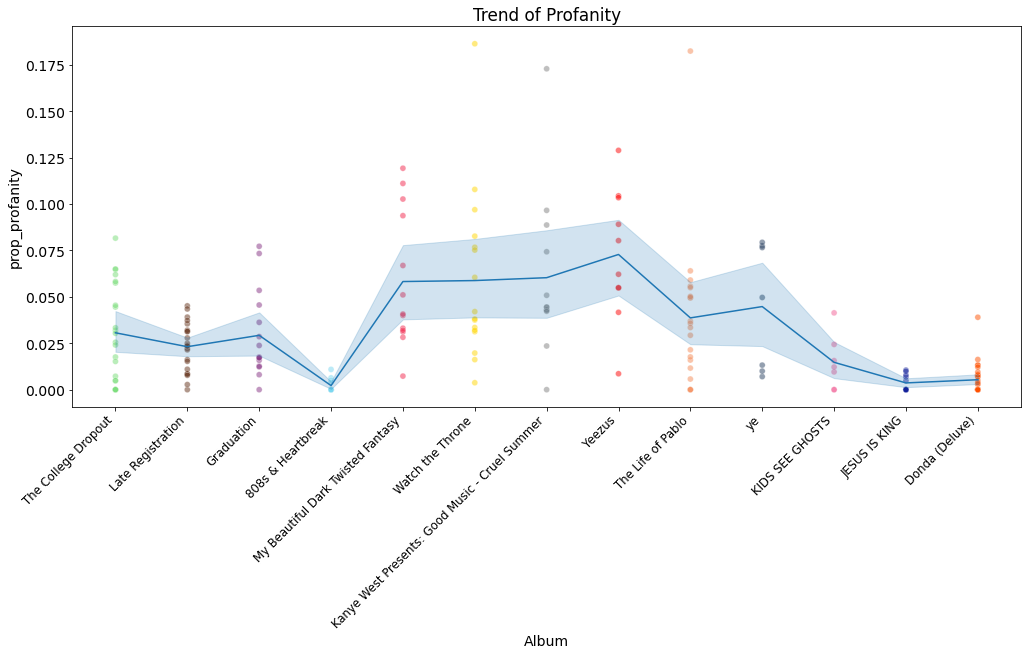

In [28]:
ax = sns.scatterplot(data=df_prof, x='Album', y='prop_profanity', hue='Album', 
                     palette=sns.color_palette(colors, 13),legend=False, alpha=0.5)
ax.set(title="Trend of Profanity")
ax.set_xticklabels(
    labels=df_prof['Album'].unique(),
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
ax2 = sns.lineplot(data=df_prof, x='Album', y='prop_profanity')

Next, we'll look how this profanity score measures with the sentiment score of each respective album. Since the profanity proportion seems to fall between values of 0 and 0.2, we'll scale up the profanity score by a factor of 10 to make a visually better comparison.

Text(0, 0.5, '')

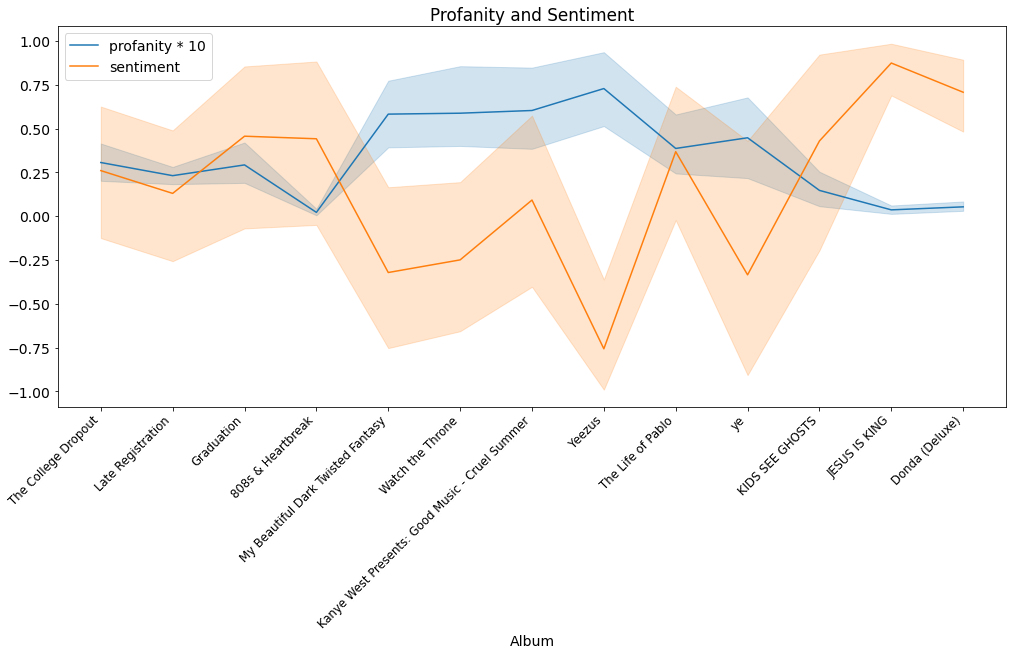

In [29]:
ax = sns.lineplot(data=df_prof, x='Album', y='prop_profanity * 10', legend='brief', label='profanity * 10')
ax.set(title="Profanity and Sentiment")
ax.set_xticklabels(
    labels=df_prof['Album'].unique(),
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
ax.set_ylabel('')
ax2 = sns.lineplot(data=df_sentiment, x='album', y='compound', legend='brief', label='sentiment')
ax2.set_ylabel('')

Here, we see a potentially inverse correlation between the amount of profanity present in the songs and the sentiment of the songs. However, in order to determine whether there is a linear relationship between profanity and sentiment and to confirm if profanity is indeed a driving factor of sentiment, we will be performing a linear regression test.

#### Linear Regression 

In [30]:
#concatenating dataframes df_prof and df_sentiment for easier analysis 
df_prof_sentiment = df_prof[['Track Name', 'Album', 'prop_profanity', 'prop_profanity * 10']]
df_prof_sentiment['sentiment_score'] = df_sentiment['compound']
df_prof_sentiment.reset_index()
df_prof_sentiment.dropna()

,Track Name,Album,prop_profanity,prop_profanity * 10,sentiment_score
0,Intro,The College Dropout,0.000000,0.000000,0.8577
1,We Don't Care,The College Dropout,0.031915,0.319149,-0.9923
2,Graduation Day,The College Dropout,0.064815,0.648148,-0.9490
3,All Falls Down,The College Dropout,0.017595,0.175953,0.9897
4,I'll Fly Away,The College Dropout,0.000000,0.000000,0.8860
...,...,...,...,...,...
195,Tell The Vision,Donda (Deluxe),0.000000,0.000000,-0.8083
196,Jonah,Donda (Deluxe),0.039007,0.390071,0.9727
197,Pure Souls,Donda (Deluxe),0.005025,0.050251,0.9837
198,Ok Ok,Donda (Deluxe),0.016234,0.162338,0.9580


In [31]:
#specify model matrix using 'patsy'
outcome, predictors = patsy.dmatrices('sentiment_score ~ prop_profanity', df_prof_sentiment)
model = sm.OLS(outcome, predictors)

#fit the model
results = model.fit()

#look at the results 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.195
Date:                Sun, 05 Jun 2022   Prob (F-statistic):            0.00276
Time:                        13:52:34   Log-Likelihood:                -251.38
No. Observations:                 195   AIC:                             506.8
Df Residuals:                     193   BIC:                             513.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4080      0.086      4.

Based on the linear regression test results, we see that the p-value is less than 0.05, assuming an alpha value of 0.05, which means that there is less than 5% chance that the profanity variable has no effect on sentiment score. However, the effect size of the proportion of profanity appears to be negative (-5.4951), indicating an inverse relationship between proportion profanity and sentiment score. The R-squared value is 0.045 which means that our model explains only 4.5% of the change in sentiment score. Additionally, the condition number is low so multicollinearity is not an issue here. In essence, while there appears to be an inverse relationship between proportion profanity and sentiment score, the majority of the variance in sentiment score cannot be explained by this linear model. Therefore, the proportion of profanity and sentiment score do not have a direct linear relationship.

Text(0.5, 1.0, 'Profanity vs. Sentiment')

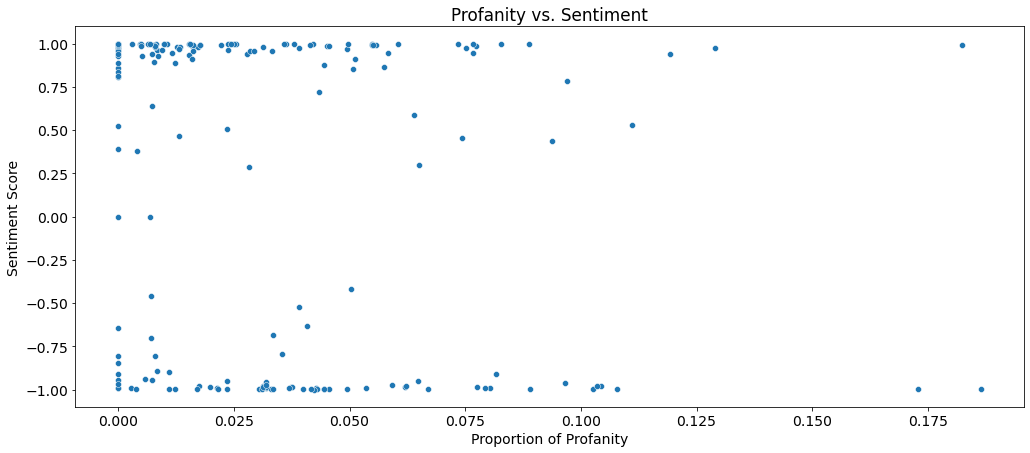

In [32]:
sns.scatterplot(x = 'prop_profanity', y = 'sentiment_score', data = df_prof_sentiment)
plt.xlabel('Proportion of Profanity')
plt.ylabel('Sentiment Score')
plt.title('Profanity vs. Sentiment')

Plotting the proportion of profanity and sentiment score on a graph, we see that the 2 variables do not have a linear relationship.

## Song Attribute Analysis

Next, we tackle the question on whether musical attributes (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo) have changed in Kanye West's music from his first album ("The College Dropout") to his most recent ("Donda (Deluxe)"). As shown earlier, we have access to such attributes via the Spotify API; however, we would ideally like to create a dataframe with each individual song's attributes in each row. Since our analysis focuses on the trend of Kanye West's music over time, we must first sort the dataset to have the songs in chronological order.

In [33]:
# sort album in chronological order
ye_albums_df = df_spotify.copy().sort_values(by='Release Date')

Now, as we can see, the data contains the albums in correct order based on release date.

In [34]:
print(ye_albums_df.Album.unique())

['The College Dropout' 'Late Registration' 'Graduation'
 '808s & Heartbreak' 'My Beautiful Dark Twisted Fantasy'
 'Watch The Throne (Deluxe)' 'Kanye West Presents Good Music Cruel Summer'
 'Yeezus' 'The Life Of Pablo' 'ye' 'KIDS SEE GHOSTS' 'JESUS IS KING'
 'Donda (Deluxe)']


Although possible to analyze all songs within Kanye West's discography, we decided against analyzing individual songs that are not part of albums. This is in part due singles having a much smaller size of characteristics, as we would be comparing a single song to an album that may contain up to 32 songs (as in the case of "Donda (Deluxe)"). Additionally, this allows us to see comparisons over the same dataset as the lyrical analysis above, as singles were removed due to lyric frequency being significantly lower in singles compared to albums. Thus, we removed the singles from the dataset.

Now that we know ye_albums_df is in order by release date, we will now reindex the rows in order to see how many songs are in the dataset more easily, and we will additionally drop the columns not needed in our analysis (we will drop the release date and track name, as they will not be necessary for analysis of the song attributes in their respective albums).

In [35]:
ye_albums_df = ye_albums_df.reset_index(drop=True)
ye_albums_df = ye_albums_df.drop(columns=['Track Name', 'Release Date'])

ye_albums_df

,Album,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The College Dropout,0.713,0.331,6,-13.909,1,0.8770,0.23700,0.000000,0.510,0.463,87.491
1,The College Dropout,0.473,0.727,8,-6.843,1,0.3560,0.57700,0.000000,0.316,0.854,83.212
2,The College Dropout,0.744,0.524,1,-7.452,1,0.2100,0.13900,0.000000,0.392,0.606,93.691
3,The College Dropout,0.571,0.739,7,-6.110,1,0.2470,0.00865,0.000005,0.158,0.660,83.089
4,The College Dropout,0.442,0.807,6,-4.753,1,0.2650,0.01580,0.000006,0.217,0.446,84.649
...,...,...,...,...,...,...,...,...,...,...,...,...
187,Donda (Deluxe),0.701,0.444,7,-10.814,0,0.0443,0.22000,0.000000,0.104,0.198,144.023
188,Donda (Deluxe),0.510,0.428,2,-8.455,0,0.2330,0.78500,0.000000,0.274,0.112,84.272
189,Donda (Deluxe),0.384,0.531,5,-6.965,1,0.0452,0.11700,0.000000,0.249,0.237,97.153
190,Donda (Deluxe),0.594,0.669,6,-4.683,0,0.2020,0.05730,0.000000,0.409,0.263,91.371


Therefore, we have obtained a dataframe containing 192 songs across 13 albums. Since we are comparing how the song attributes have changed across albums, the 'Albums' column will not be part of the attributes we are analyzing in the numerical analysis (it will help when grouping data and seeing trends over time). Thus, we first create a list of the attributes we look to analyze.

In [36]:
attributes = list(ye_albums_df.columns)[1:]

attributes

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo']

Therefore, we are set to separate the data into graphical forms to better visualize the data. Since we are seeing trends from Kanye West's oldest album ("The College Dropout") to his newesdt album ("Donda (Deluxe)"), we will place all of Kanye West's albums along the x-axis in chronological order, and we will use a boxplot to repressent both the distribution and median values for each attribute we are observing within each album. This allows us to observe two important aspects regarding our research question. First, this will allow us to see where a majority of songs within an album lie with respect to each attribute, all while being more resistant to outliers (so a single songs will not drastically sway the data), and we will also be able to see if Kanye West has more variability in the observed characteristic within certain albums versus others.

Text(0.4, 1.005, 'Song Attribute Data Per Album')

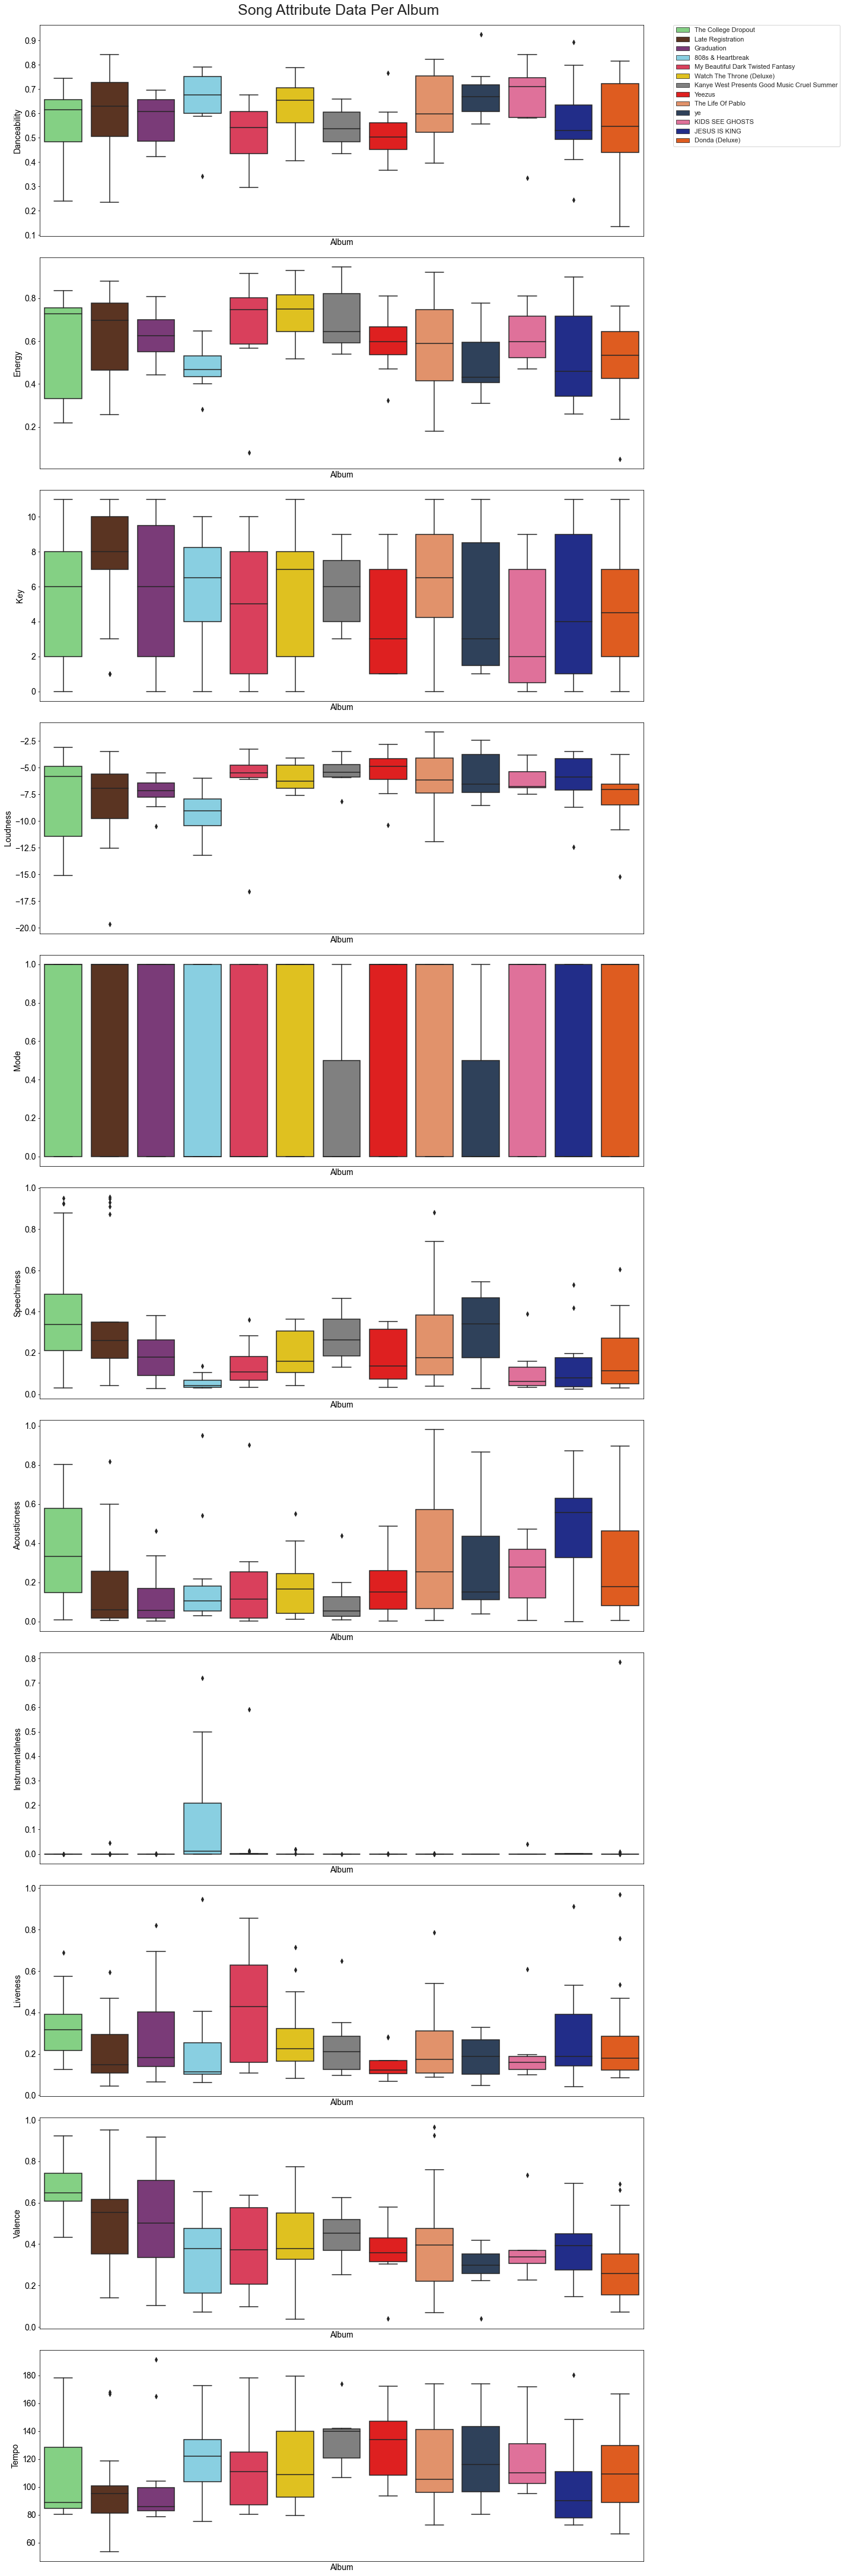

In [37]:
fig, axs = plt.subplots(11, 1)
axs = axs.flatten()

for iteration in range(len(attributes)):
    sns.set_theme(style="whitegrid")
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x='Album', y=attributes[iteration], hue='Album', data=ye_albums_df, 
                     palette=sns.color_palette(colors, 13), ax=axs[iteration], dodge=False)
    ax.set_xticks([])
    if iteration == 0:
        axs[iteration].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    else:
        axs[iteration].legend([],[], frameon=False)
    plt.gcf().set_size_inches(20, 60)
fig.tight_layout()

fig.suptitle('Song Attribute Data Per Album', fontsize=25, y=1.005, x=0.4)

As we can see from the above boxplots, although many listeners of Kanye West's music believe his musical style has changed over the years, many of the attributes obtained from Spotify's API do not have drastic differences from Kanye West's oldest album to his most recent. In accordance to the boxplots above, we can see that there seems to have been a decrease in energy over time in Kanye West's music, and the median value in the valence of his albums have ssn a constant decrease over time. In Kanye West's other albums however, the median values seem to be quite similar to each other, with little variance from the first to last albums. In terms of the distribution, although the median loudness seems to have little variance over time, the distribution within his first album seems to be significantly larger than his later albums. 

To discover if trends exist within the data on musical features, we will run a series of Mann Kendall Tests (MKT) - one on each feature. The null hypothesis is that no trend is present while the alternative hypothesis is that a trend exists. Additionally, we will set the confidence interval at 95%. Finally, before running the test on each separate feature, we must sort the data by ascending date and ensure that our data fits the criteria necessary for the MKT. The date observations are representative of the true conditions at sampling times (ie. accurate), the sample collection method is unbiased, and there are no covariates so we are sure our data fits the proper conditions to run the MKT.

In [38]:
df = pd.read_csv("spotify_features.csv")
df = df.sort_values("Release Date")
features = ["Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]
test = mk.original_test(df["Danceability"])
MK_test = pd.DataFrame(columns = ["Feature", "Trend", "P-Value", "Slope", "Intercept"])

for feature in features:
    test = mk.original_test(df[feature])
    MK_row = {"Feature": feature, "Trend":test[0], "P-Value":test[2], "Slope":test[7], "Intercept":test[8]}
    MK_test = MK_test.append(MK_row, ignore_index = True)

MK_test

,Feature,Trend,P-Value,Slope,Intercept
0,Danceability,no trend,8.353735e-01,-0.000041,0.598398
1,Energy,decreasing,8.132066e-03,-0.000664,0.682432
2,Key,decreasing,3.788745e-02,-0.006711,6.640940
3,Loudness,no trend,3.976398e-01,0.002444,-6.681944
4,Mode,no trend,6.764978e-01,0.000000,1.000000
5,Speechiness,decreasing,2.955980e-03,-0.000554,0.224902
6,Acousticness,no trend,6.913931e-02,0.000387,0.128494
7,Instrumentalness,no trend,2.043737e-01,0.000000,0.000000
8,Liveness,no trend,2.047127e-01,-0.000187,0.198906
9,Valence,decreasing,4.352518e-12,-0.001964,0.581056


The above dataframe shows the results of the MKT for each feature. Now let us filter by p-values less than or equal to 0.05 so we can see the statistically signifcant results. In other words, we're removing the test results where we are unable to reject the null hypothesis.

In [39]:
significant_MK = MK_test.loc[MK_test["P-Value"] <= 0.05]
significant_MK

,Feature,Trend,P-Value,Slope,Intercept
1,Energy,decreasing,8.132066e-03,-0.000664,0.682432
2,Key,decreasing,3.788745e-02,-0.006711,6.640940
5,Speechiness,decreasing,2.955980e-03,-0.000554,0.224902
9,Valence,decreasing,4.352518e-12,-0.001964,0.581056


From the results above, we can clearly see that there is a general decreasing trend for Energy, Key, Speechiness, and Valence across Kanye's discography.

# Ethics & Privacy

As we have used Spotify’s and Genius’ API to gather data about Kanye West’s discography (both of which are available for non-commercial use), no qualms about breach of privacy were had, as the terms of service of both companies were respected in using the API. Additionally, since our project focused on analyzing information about Kanye West’s songs, anonymization and leaking Kanye West’s personal information were of no concern.

Although we believe our findings to be representative of Kanye West’s music trends from his first album to his most recent album, some ethical questions must be addressed when viewing the data. First, it is important to note that in our research, we are making comparisons across albums, and removed singles or works that Kanye West were not a major contributor in. Thus, we are aware that it may not be reflective of his discography as a whole (which our research question does not concern). Additionally, since Kanye West’s discography contains only 192 songs spread across 13 albums, the trend of data may be susceptible to outliers when new albums are released. Though this does not concern our research as ours focuses on albums solely from “The College Dropout” to “Donda (Deluxe)”, this is an important factor to consider for continued research on the subject.

# Conclusion & Discussion

This project uses many methods such as lyrical and attribute analysis to explore and analyze the trend of Kanye West’s extensive discography. In order to achieve this, we pulled data across Spotify’s API to obtain Spotify-based song attributes, and Genius’s API to obtain the lyrics for each song.

With respect to the lyrics, we split the analysis into two parts: lexical diversity and sentiment analysis. Regarding lexical diversity, we previously judged it to be in a downtrend due to our own listening experiences, as the wordplay of his lyrics of his more recent albums have become noticeably simpler over time. However, it was determined that there was no change in trend in accordance to the repetitiveness of his music. Regarding sentiment, we correctly predicted a V-shaped trend in sentiment. Following this, we also explore the relationship between the amount of profanity present in his music over time, and how this affects general sentiment. While the two variables are indeed inversely correlated, a linear regression shows that it cannot be concluded that there is a direct linear relationship between them.

For musical attributes, we analyzed how the musical attributes of Kanye’s albums changed over time from his first album, The College Dropout, to his most recent, Donda (Deluxe). First, we plotted the scores of each attribute across all of his albums in the form of boxplots. We decided to remove singles from the analysis because singles have a smaller size of characteristics and comparing a single song to an album that can contain up to 32 songs can skew the analysis. While most attributes do not show significant changes over time, we do notice an overall decrease in energy and a constant decrease in median value of valence. The median loudness of his first album is significantly higher than his later albums. To confirm the trends of the musical features, we ran a series of Mann Kendall Tests (MKTs) and filtered by p-values less than or equal to 0.05 to get the statistically significant results. The results show that there is an overall decreasing trend for energy, key, speechiness, and valence across Kanye’s albums. Therefore, from the visualization and MKTs, we can confirm that both energy and valence have a decreasing trend over time across his albums. 

The main limitation of our analysis is the inaccessible data we are unable to analyze. For instance, we are unable to analyze certain musical attributes, such as chord progressions, due to the limited scope of our chosen datasets. With the Spotify API, the only provided variables to use were song features such as dancibility, energy, valence, and more. If given information, such as segments, pitch, beats, and more, a more thorough and advance analysis would have been possible. Another limitation was the incomplete discography that we were publicly given. On the Genius API, the second dataset we used, Kanye is listed to be credited for over 800 songs. However, his officially released songs tally up to only 195 songs in total. Since we are only given certain musical features to analyze from the Spotify API and a minuscule portion of his official released songs, we are given a smaller dataset than ideal to work with. This, in turn, would make our analysis much more susceptible to outliers than if we were to have a larger dataset. 


# Team Contributions

Matthew Leffler
- Wrote code and EDA for song attribute analysis section, additionally wrote the ethics and privacy section

Michael Donaldson
- Performed data collection and cleaning for lyrics dataset, wrote EDA for lexical diversity and sentiment analysis, conclusion

Cairo Simpson
- Wrote code and analysis for inferential analysis, contributed to background and wrote overview, pulled and cleaned data for Spotify feature

Michelle Liu
- Wrote code and analysis for linear regression test on sentiment score vs. profanity, contributed to the conclusion section, discussing the results of our analysis on the spotify data, slides

Charmie Donasco 
- Background research, Conclusion, Mann-Kendall Testing (TTR), Linear Regression(Lyrical), Slides, Video Editing